<a href="https://colab.research.google.com/github/Soumya2226/Rain_Predictive_Analysis/blob/main/Rain_Predictive_Analysis_EDA_%26_ML_Model_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:** <a class="anchor" id="1"></a>
[Table of Contents](#0.1)

>The mian aim of this project is to predict whether it will rain or not in Australia. Rain prediciton depends upon a number of factors like temperature, humidity, wind speed, wind direction etc.
>
>- In our project we want to build a model that can predict whether it will rain or not with maximum accuracy and minimal error.

# **Loading libraries**<a class="anchor" id="2"></a>
[Table of Contents](#0.2)

In [1]:
# importing libraries

# general purpose libraries
import numpy as np
import pandas as pd

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for statical analysis
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for preprocessing
from sklearn.preprocessing import StandardScaler , LabelEncoder

# for train test split
from sklearn.model_selection import train_test_split

# for oversampling
from imblearn.over_sampling import SMOTE

# for models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# for evaluation
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , recall_score , precision_score , f1_score

%matplotlib inline

# **Previewing dataset** <a class="anchor" id="3"></a>

[Table of Contents](#0.3)

In [2]:
# to hide any warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
# to make sure all the columns are displayed
pd.set_option('display.max_columns' , None)

In [4]:
# load the dataset
df = pd.read_csv('weatherAUS.csv')

# preview the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# **Column Descriptions:** <a class="anchor" id="4"></a>
[Table of Contents](#0.4)
1. **Date**
   - **Description**: The date of observation.
   - **Format**: YYYY-MM-DD.

2. **Location**
   - **Description**: The common name of the location of the weather station.

3. **MinTemp**
   - **Description**: The minimum temperature recorded in degrees Celsius.

4. **MaxTemp**
   - **Description**: The maximum temperature recorded in degrees Celsius.

5. **Rainfall**
   - **Description**: The amount of rainfall recorded for the day in millimeters.

6. **Evaporation**
   - **Description**: The Class A pan evaporation in millimeters in the 24 hours to 9 AM.

7. **Sunshine**
   - **Description**: The number of hours of bright sunshine during the day.

8. **WindGustDir**
   - **Description**: The direction of the strongest wind gust in the 24 hours to midnight.

9. **WindGustSpeed**
   - **Description**: The speed of the strongest wind gust in kilometers per hour in the 24 hours to midnight.

10. **WindDir9am**
    - **Description**: The direction of the wind at 9 AM.

11. **WindDir3pm**
    - **Description**: The direction of the wind at 3 PM.

12. **WindSpeed9am**
    - **Description**: Wind speed averaged over 10 minutes prior to 9 AM in kilometers per hour.

13. **WindSpeed3pm**
    - **Description**: Wind speed averaged over 10 minutes prior to 3 PM in kilometers per hour.

14. **Humidity9am**
    - **Description**: Humidity percentage at 9 AM.

15. **Humidity3pm**
    - **Description**: Humidity percentage at 3 PM.

16. **Pressure9am**
    - **Description**: Atmospheric pressure reduced to mean sea level at 9 AM in hectopascals (hPa).

17. **Pressure3pm**
    - **Description**: Atmospheric pressure reduced to mean sea level at 3 PM in hectopascals (hPa).

18. **Cloud9am**
    - **Description**: Fraction of the sky obscured by cloud at 9 AM, measured in oktas (eighths). A value of 0 indicates a completely clear sky, while a value of 8 indicates completely overcast conditions.

19. **Cloud3pm**
    - **Description**: Fraction of the sky obscured by cloud at 3 PM, measured in oktas (eighths). See Cloud9am for a description of the values.

20. **Temp9am**
    - **Description**: Temperature at 9 AM in degrees Celsius.

21. **Temp3pm**
    - **Description**: Temperature at 3 PM in degrees Celsius.

22. **RainToday**
    - **Description**: Boolean indicator (1 if precipitation in the 24 hours to 9 AM exceeds 1 mm, otherwise 0).

23. **RainTomorrow**
    - **Description**: The amount of rainfall the next day in millimeters. Used to create the response variable RainTomorrow, indicating the "risk" of rain.


# **Getting know about dataset** <a class="anchor" id="5"></a>

[Table of Contents](#0.5)

In [5]:
# check for the exact column names
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
# checking the shape of the dataset

print(f'The no. of rows in dataset is {df.shape[0]} \n  The no. of columns are {df.shape[1]}')

The no. of rows in dataset is 145460 
  The no. of columns are 23


In [7]:
# checking data types of columns
df.dtypes

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


In [8]:
# checking test statistics of numeric columns
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


# **Handling missing values** <a class="anchor" id="6"></a>

[Table of Contents](#0.6)

In [9]:
# check for missing values

df.isna().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [10]:
# checking the percentage of missing values

df.isnull().sum() / df.shape[0] *100

,0
Date,0.000000
Location,0.000000
MinTemp,1.020899
MaxTemp,0.866905
Rainfall,2.241853
Evaporation,43.166506
Sunshine,48.009762
WindGustDir,7.098859
WindGustSpeed,7.055548
WindDir9am,7.263853


## **Plotting missing values**

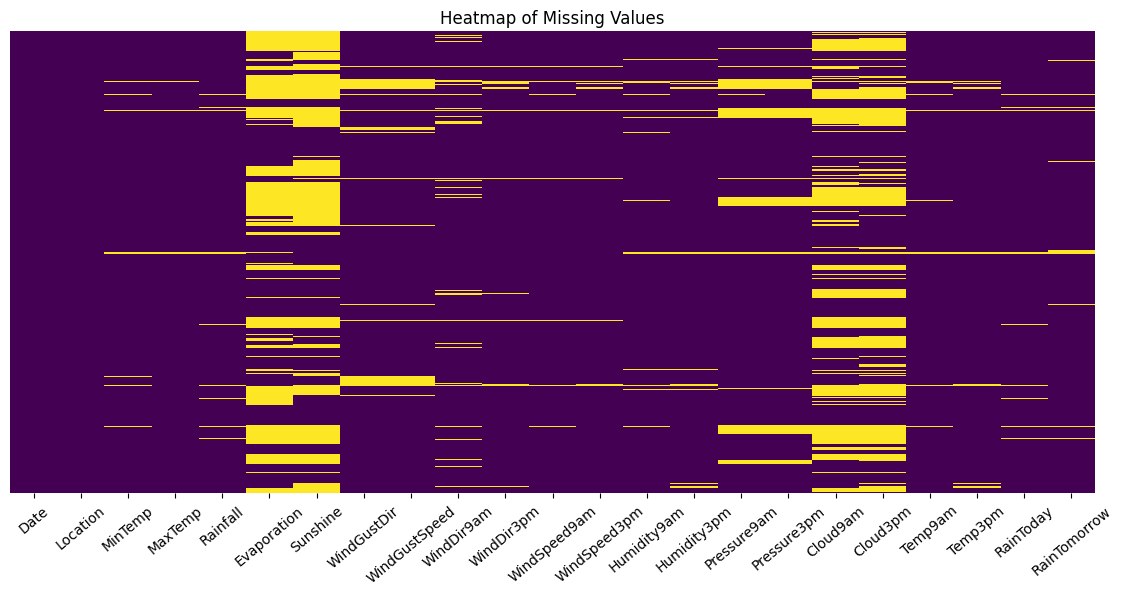

In [11]:
# plotting missing values

# setting up the figure size
plt.figure(figsize=(14,6))
# plotting the heatmap
sns.heatmap(df.isnull() , cbar=False , cmap='viridis' , yticklabels=False)
# rotating the x axis labels
plt.xticks(rotation=40)
# definig the title
plt.title('Heatmap of Missing Values')
plt.show()

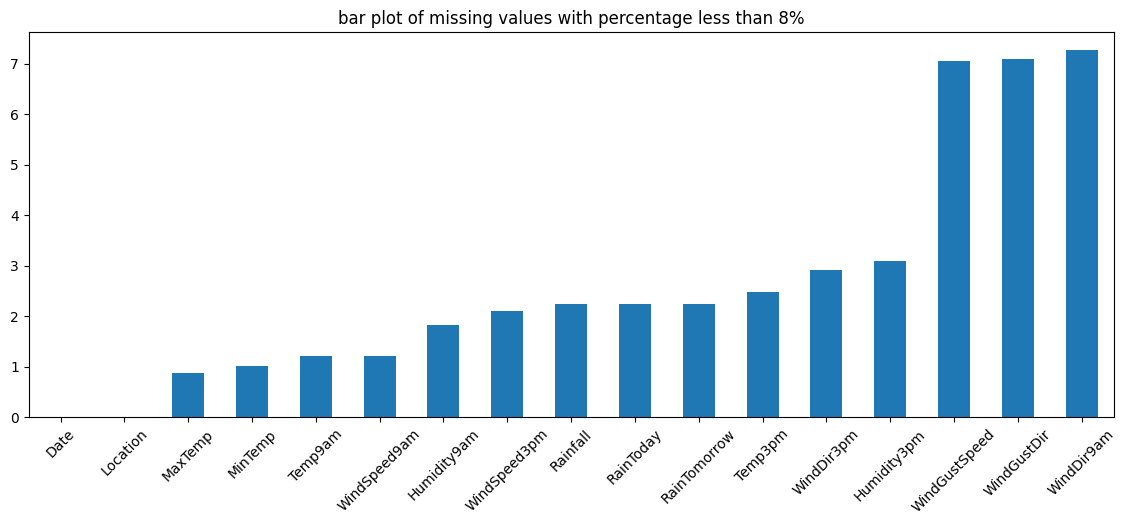

In [12]:
# plotting missing values

# setting up the figure
plt.figure(figsize=(14,5))
# calculating the percentage of missing values
missing = df.isnull().sum() / df.shape[0] *100
# plotting the bar plot of missing values with percentage less than 8%
missing = missing[missing < 8].sort_values().plot.bar()
# rotating the x axis labels
plt.xticks(rotation=45)
# setting up the title
plt.title('bar plot of missing values with percentage less than 8%')
plt.show()

## **Imputing missing values**

In [13]:
# Get unique enteries from Location column of the dataset
unique_location = df['Location'].unique()

# Iterate over each column with missing values which have numeirc data type
for column in df.select_dtypes(exclude='object'):
    # setting up a condition to check missing values
    if df[column].isnull().any():
        # Iterate over each unique location
        for location in unique_location:
            # Calculate the median value for the each unique location entry and column
            location_median = df[df['Location'] == location][column].median()
            # Fill missing values with the medin of the specific location
            df.loc[df['Location'] == location, column] = df[df['Location'] == location][column].fillna(location_median)
    # iterate over each column with misssing values which have object data type
    elif df.select_dtypes(include='object'):
        # iterate over each unique location
        for location in unique_location:
            # Calculate the median value for the each unique location entry and column
            location_mode = df[df['Location'] == location][column].mode()[0]
            # Fill missing values with the mode of the specific location
            df.loc[df['Location'] == location , column ] = df[df['Location']==location][column].fillna(location_mode)

----
### **Description of above Steps:**
- In the above code, snipet we filled the missing values in the dataset by using a unique startegy:
  - We impute missing values according to the unique enteries of the `Location` colun.
  - For the numeric column we calculate the median of the column where values are missing by using the unique enteries of the `Location` column and then fill the missing values with the median.
  - Same approach is used for the object column. We calculate the mode of the column where values are missing by using the unique enteries of the `Location` column and then fill the missing values with the mode.

----

In [14]:
# confirming the outcome

df.isna().sum() / len(df) *100

,0
Date,0.000000
Location,0.000000
MinTemp,0.000000
MaxTemp,0.000000
Rainfall,0.000000
Evaporation,31.287639
Sunshine,36.552317
WindGustDir,7.098859
WindGustSpeed,4.179156
WindDir9am,7.263853


---

### **Observation:**

- Still we have left with some missing values in the dataset.
- These missing values cannot be filled with the above mentioned imputation method.
- Becasue these above listed missing values are not collected for the specific location
- Hence, we cannot impute these missing values with mean or median of the whole dataset as every city in `Location` column has its own demographical weather conditions

---

## **Dropping rows with missing values**

In [15]:
# dropping the rows with missing values

df.dropna(subset=['WindGustDir' , 'WindGustSpeed' , 'WindDir9am', 'WindDir3pm' , 'Pressure9am' , 'Pressure3pm' , 'RainToday' ,  'RainTomorrow',
                  'Evaporation','Sunshine', 'Cloud9am' , 'Cloud3pm']
                    , inplace=True  , axis= 0)

In [16]:
# resetting the index of the dataframe
df.reset_index(drop=True , inplace=True)

In [17]:
# checking the shape of the dataframe after imputing the missing values
df.shape

(72866, 23)

----

### **Observation:**
- Before dropping the rows with missing values our dataframe contain 145460 rows but now we have left with 72866 rows. That means we dropped 72,594 rows from our dataset which is almost 50% of the rows in our dataset.

---

In [18]:
# confirming the outcome
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


# **Feature Engineering**  <a class="anchor" id="7"></a>

[Table of Contents](#7)

In [19]:
# checking the data type of Date column

print(f'The data type of Date column is {df.Date.dtype}')

The data type of Date column is object


## **Converting the data type of Date column to datetime**

In [20]:
# converting the data type of Date column to datetime
df['Date'] = pd.to_datetime(df['Date'] )

## **Feature extraction from Date**

In [21]:
# Feature extraction from Date

# extracting day, month and year from Date and creating new columns

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [22]:
# dropping the Date column
df.drop(['Date'] , axis=1 , inplace=True)

In [23]:
# checking the column names
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

In [24]:
# checking the first 5 rows
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,1,1,2009
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,2,1,2009
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,4,1,2009
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,5,1,2009
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,6,1,2009


# **Exploratory Data Analysis** <a class="anchor" id="8"></a>

[Table of Contents](#8)

## **check for the count of unique values in each column**


In [25]:
# check for the count of unique values in each column

df.nunique().sort_values(ascending=True)

,0
RainTomorrow,2
RainToday,2
Cloud3pm,10
year,11
Cloud9am,11
month,12
WindGustDir,16
WindDir3pm,16
WindDir9am,16
Location,26


## **Duplicate rows**


In [26]:
# checking for duplicate rows
print("duplicate rows = " ,df.duplicated().sum())

duplicate rows =  0


---

### **Observation:**
- There are no duplicate rows in our dataset

---

## **Getting info from `year & Location` column**

In [27]:
# checking the unique values of year
df.year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007, 2008],
      dtype=int32)

In [28]:
# checking the count of each year
df.year.value_counts().sort_index()

,count
year,
2007,61
2008,1338
2009,8574
2010,8693
2011,8008
2012,8117
2013,8165
2014,8531
2015,8473


In [29]:
df.columns # checking the column names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

In [30]:
# checking the unique values of Location
df.Location.nunique()

26

In [31]:
# checking the unique enteries of Location column
df.Location.unique()

array(['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia',
       'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa',
       'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings',
       'Darwin'], dtype=object)

In [32]:
# checking the count of each Location

df.Location.value_counts().sort_index()

,count
Location,
AliceSprings,2748
Brisbane,3029
Cairns,2900
Canberra,2762
Cobar,2925
CoffsHarbour,2568
Darwin,3119
Hobart,3106
Melbourne,2240


----
### **Observation:**

The data is collected from the 26 cities of Australia over the period of 11 years which starts from 2007 to 2017.

----

## **Getting info from `MinTemp` column**

### **`Location` with lowest `MinTemp`**

In [33]:
# Location with lowest MinTemp
df.groupby(['Location' , 'year' , 'month'])['MinTemp'].min().sort_values(ascending=True).head()

Location  year  month
Canberra  2014  8       -7.6
          2015  6       -7.0
          2011  5       -6.9
          2012  9       -6.8
          2011  7       -6.7
Name: MinTemp, dtype: float64

In [34]:
# describing the MinTemp
df['MinTemp'].describe()

,MinTemp
count,72866.000000
mean,13.125480
std,6.464502
min,-7.600000
25%,8.200000
50%,12.900000
75%,18.000000
max,31.900000


### **`Location` with avg `MinTemp`**

In [35]:
# Location with avg MinTemp

# calculating the mean of MinTemp
mean_MinTemp = df['MinTemp'].mean()

# Location with avg MinTemp
df.loc[df['MinTemp'] == mean_MinTemp.round(1)][['MinTemp' , 'Location',  'year' , 'month']].sort_values( by='Location')

,MinTemp,Location,year,month
68366,13.1,AliceSprings,2013,4
69481,13.1,AliceSprings,2016,8
69419,13.1,AliceSprings,2016,6
68607,13.1,AliceSprings,2014,1
68551,13.1,AliceSprings,2013,11
...,...,...,...,...
55093,13.1,Woomera,2009,4
57496,13.1,Woomera,2016,4
57694,13.1,Woomera,2016,10
55076,13.1,Woomera,2009,3


---
### **Observation:**

- Average MinTemp is 13.12
- The range of MinTemp lies between -7.6 to 31.9
- Cannebra is the coldest city in Australia with MinTemp of -7.6

---

## **Getting info from `MaxTemp` column**

In [36]:
#  test statistics of MaxTemp

df.MaxTemp.describe()

,MaxTemp
count,72866.000000
mean,24.064079
std,7.015507
min,4.100000
25%,18.500000
50%,23.700000
75%,29.400000
max,48.100000


In [37]:
# count of the unique values in MaxTemp

df.MaxTemp.nunique()

400

### **`Location` with highest `MaxTemp`**

In [38]:
# Location with highest MaxTemp

# Group by 'Location', 'year', 'month' and calculate the mean or another aggregation function for 'MaxTemp'
grouped_df = df.groupby(['Location', 'year', 'month'])['MaxTemp'].max().reset_index()

# Sort the resulting DataFrame by 'MaxTemp' in descending order
grouped_df.sort_values(by='MaxTemp', ascending=False).head()



,Location,year,month,MaxTemp
2493,Woomera,2011,1,48.1
1192,Moree,2017,2,47.3
1155,Moree,2014,1,47.3
901,MelbourneAirport,2009,2,46.8
2563,Woomera,2017,2,46.8


---
### **Observations:**

- According to the test statistics, the rane of `MaxTemp` lies in between 4.1 to 48.1
- And, there are `400` unique values in `MaxTemp`
- `Woomera` is the hottest city in Australia with the `MaxTemp` of 48.1 in 2011

----

## **Getting info from `Rainfall` column**

In [39]:
# test statistics of Rainfall
df.Rainfall.describe()

,Rainfall
count,72866.000000
mean,2.378084
std,9.085335
min,0.000000
25%,0.000000
50%,0.000000
75%,0.600000
max,367.600000


### **Bar plot of `Rainfall` v/s `year`**

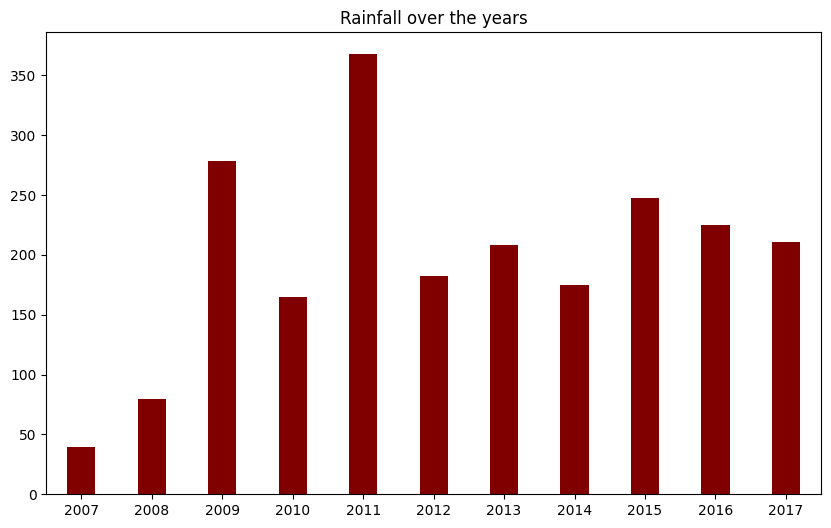

In [40]:
# defining the figure size
plt.figure(figsize=(10,6))
# plotting the graph
plt.bar(df.year, df.Rainfall , color ='maroon', width = 0.4)
# Set x-axis limits
plt.xlim(2007-0.5, 2017+0.5)

# Set x-tick labels, creating ticks for each year between 2007 and 2017
plt.xticks(np.arange(2007, 2018, 1))

#plt.show()
plt.title("Rainfall over the years")

plt.show()

### **`Location` with highest `Rainfall`**

In [41]:
# Find the maximum rainfall value
max_rainfall = df['Rainfall'].max()

# Filter the DataFrame to get the location(s) with the maximum rainfall
df[df['Rainfall'] == max_rainfall][['Location' , 'Rainfall' , 'year', 'month']]

,Location,Rainfall,year,month
70689,Darwin,367.6,2011,2


----

### **Observation:**
- Average Rainfall for the period when data is collected is 2.37 mm
- Darwin experience is highest amount of Rainfall in 2nd month of 2011 which recorded as 367.6 mm
- Data shows highest Rainfall occured in 2011 followed by 2009 and 2015.

----

## **Getting info from `Sunshine` column**

In [42]:
# Find the count of unique values in Sunshine
df.Sunshine.nunique()

146

In [43]:
# test statistics of Sunshine
df.Sunshine.describe()

,Sunshine
count,72866.000000
mean,7.874997
std,3.505031
min,0.000000
25%,5.900000
50%,8.600000
75%,10.400000
max,14.500000


### **`Location` with maximumhours of `Sunshine`**

In [44]:
# location with maximum Sunshine
max_sunshine = df['Sunshine'].max()
df.loc[df['Sunshine'] == max_sunshine][['Location' ,'Sunshine' ,'year' , 'month']].sort_values(ascending=False , by = 'Location')

,Location,Sunshine,year,month
34322,Mildura,14.5,2015,12


### **top ten `Location` with maximum hours of  `Sunshine`**


In [45]:
# top ten location with maximum hours of  Sunshine

df.groupby(['Location' , 'year' , 'month'])['Sunshine'].max().reset_index().sort_values(ascending=False, by='Sunshine').head(10)

,Location,year,month,Sunshine
1079,Mildura,2015,12,14.5
1430,Nuriootpa,2011,12,14.3
1210,MountGambier,2010,1,14.3
1711,Portland,2010,1,14.3
2469,Woomera,2009,1,14.2
733,Hobart,2010,11,14.2
2240,WaggaWagga,2014,12,14.1
1488,Nuriootpa,2016,12,14.1
1767,Portland,2014,12,14.1
1429,Nuriootpa,2011,11,14.1


### **`Location` with min hours of  `Sunshine`**

In [46]:
# location with min hours of  Sunshine

df.groupby(['Location' , 'year' , 'month'])['Sunshine'].min().sort_values(ascending=True)

Location      year  month
Woomera       2017  6         0.0
PerthAirport  2012  5         0.0
Hobart        2014  2         0.0
                    3         0.0
                    4         0.0
                             ... 
AliceSprings  2017  2        10.6
                    5        10.6
                    4        10.6
                    1        10.6
              2016  11       10.6
Name: Sunshine, Length: 2568, dtype: float64

---

### **Observation:**

- Sunshine column has 146 unique values
- The maximum hours of Sunshine observed is 14.5 hours in Mildura city in 2015 in the month of December
- The average hours of sunshine observed is 7.87 with 50% areas have experience more than 8 hours of sunshine
- Womera , Perth and Hobart has experience no sunshine in 2017 , 2012 and 2014 respectively for the particular months of June, May and Feburary

---

In [47]:
# columns in the dataframe
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

## **Getting info from `Cloud9am` column**

In [48]:
# unique values of Cloud9am
df.Cloud9am.unique()

array([2. , 1. , 8. , 3. , 0. , 4. , 7. , 5. , 6. , 4.5, 9. ])

In [49]:
# value counts of Cloud9am
df.Cloud9am.value_counts()

,count
Cloud9am,
7.0,16776
1.0,13027
6.0,8757
8.0,8320
0.0,6317
2.0,5881
3.0,4936
5.0,4853
4.0,3458


In [50]:
# descriptive statistics of Cloud9am
df.Cloud9am.describe()

,Cloud9am
count,72866.000000
mean,4.345881
std,2.777711
min,0.000000
25%,1.000000
50%,5.000000
75%,7.000000
max,9.000000


### **city in `Location` column with highest `cloud9am` oktas in the whole year**


In [51]:
# which city in the location column has highest cloud9am octas in the whole year

df.groupby(['Location' , 'year' , 'month'])['Cloud9am'].max().reset_index().sort_values(ascending=  False, by='Cloud9am').head(10)

,Location,year,month,Cloud9am
351,Canberra,2012,5,9.0
0,AliceSprings,2008,12,8.0
1608,PerthAirport,2009,9,8.0
1610,PerthAirport,2009,11,8.0
1613,PerthAirport,2010,2,8.0
1614,PerthAirport,2010,3,8.0
1615,PerthAirport,2010,4,8.0
1617,PerthAirport,2010,6,8.0
1619,PerthAirport,2010,8,8.0
1620,PerthAirport,2010,9,8.0


### **city in `Location` column with lowest `cloud9am` oktas in the whole year**

In [52]:
# which city in the location column has lowest cloud9am octas in the whole year
df.loc[df['Cloud9am'].idxmin() , ['Location' , 'Cloud9am' , 'year' , 'month']]

,10
Location,Cobar
Cloud9am,0.0
year,2009
month,1


In [53]:
# Find the row with the highest Cloud9am
max_cloud9am_row = df.loc[df['Cloud9am'].idxmax()]

# Display the location with the highest Cloud9am
print(max_cloud9am_row['Location'])


Canberra


---
### **Observations:**

- The `Cloud9am` column has 11 unique values ranges from 0 to 9
- 0 means no cloud whereas 9 means overcast
- The average `cloud9am` observed is 4.34 with 50% areas have experience 5 oktas
- `Canberra` is the only location with the cloud9am oktas of 9 in the whole year in the month of May in our dataset

---

# **Preprocessing the data** <a class="anchor" id="9"></a>

[Table of Contents](#9)

In [54]:
# checking data types of columns
df.dtypes

,0
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object


## **Checking for outliers by using boxplot**

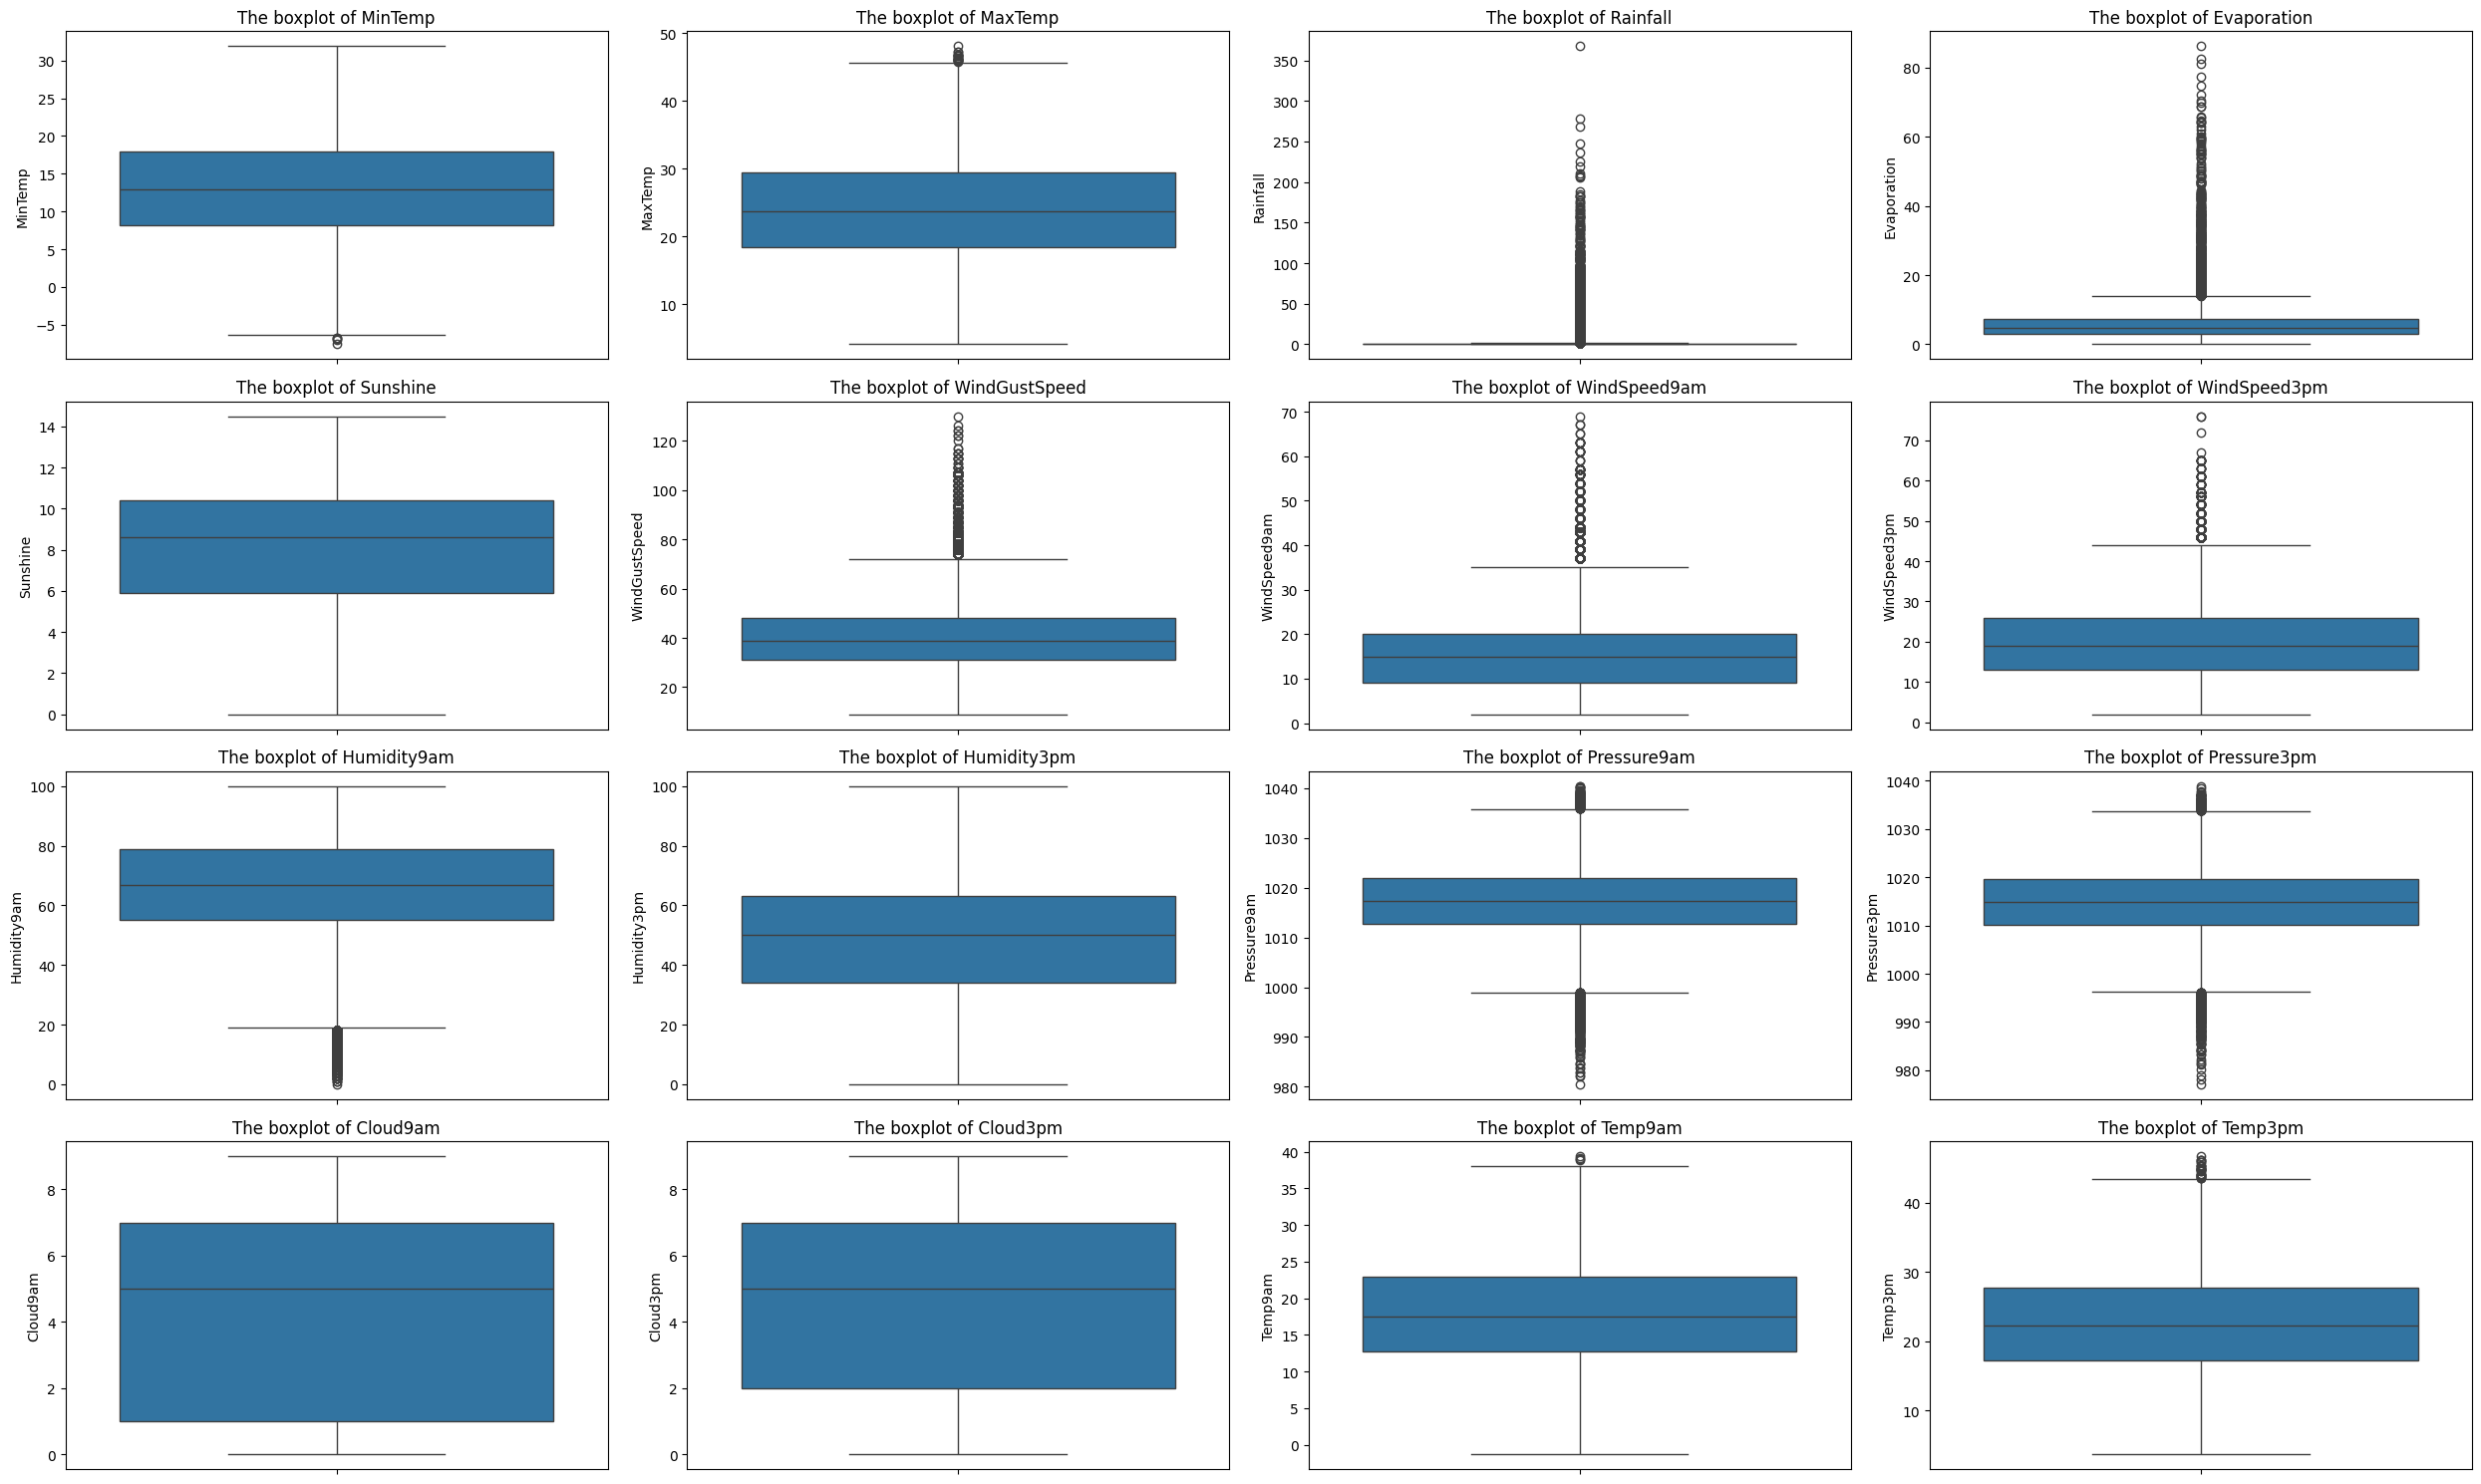

In [55]:
# Select numeric columns excluding 'object' and 'int32'
numeric_cols = df.select_dtypes(exclude=['object', 'int32']).columns

# defining the figure size
plt.figure(figsize=(25, 15))

# making for loop for subplots
for column in range(len(numeric_cols)):
    plt.subplot(4, 4, column+1)
    # plotting boxplot
    sns.boxplot(y=df[numeric_cols[column]])
    # defining column name for as title for each boxplot
    plt.title(f'The boxplot of {numeric_cols[column]}')
# adjusting the spacing between subplots
plt.tight_layout()
plt.show()

----

### **Observation:**
- Columns like `MaxTemp , Rainfall , Evaporation , WindGustSpeed , WindSpeed9am , WindSpeed3pm , Humidity9am , Pressure3pm , Pressure9am , Temp9am , Temp3pm` have outliers.
- Foe dealing these outliers we will use IQR (Interquantile range)
---

In [56]:
df.columns # checking the column names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

In [57]:
# List of columns to check data types
col = ['MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure3pm', 'Pressure9am', 'Temp9am', 'Temp3pm']

for i in col:
    print(f"{i}: {df[i].dtype}")

MaxTemp: float64
Rainfall: float64
Evaporation: float64
WindGustSpeed: float64
WindSpeed9am: float64
WindSpeed3pm: float64
Humidity9am: float64
Pressure3pm: float64
Pressure9am: float64
Temp9am: float64
Temp3pm: float64


## **Replacing outliers with median by using `IQR`**

In [58]:
# list of column which have outliers
col = ['MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure3pm', 'Pressure9am', 'Temp9am', 'Temp3pm']

# for loop for replacing outliers
for i in col:
    # Find Q1 and Q3
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    # Find IQR
    iqr = q3 - q1
    # Find lower and upper limits
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    # Find median of the column
    median = df[i].median()

    # Replace outliers with median
    df[i] = np.where((df[i] < lower_limit) | (df[i] > upper_limit), median, df[i])

## **confirming outcomes by using boxplot again**

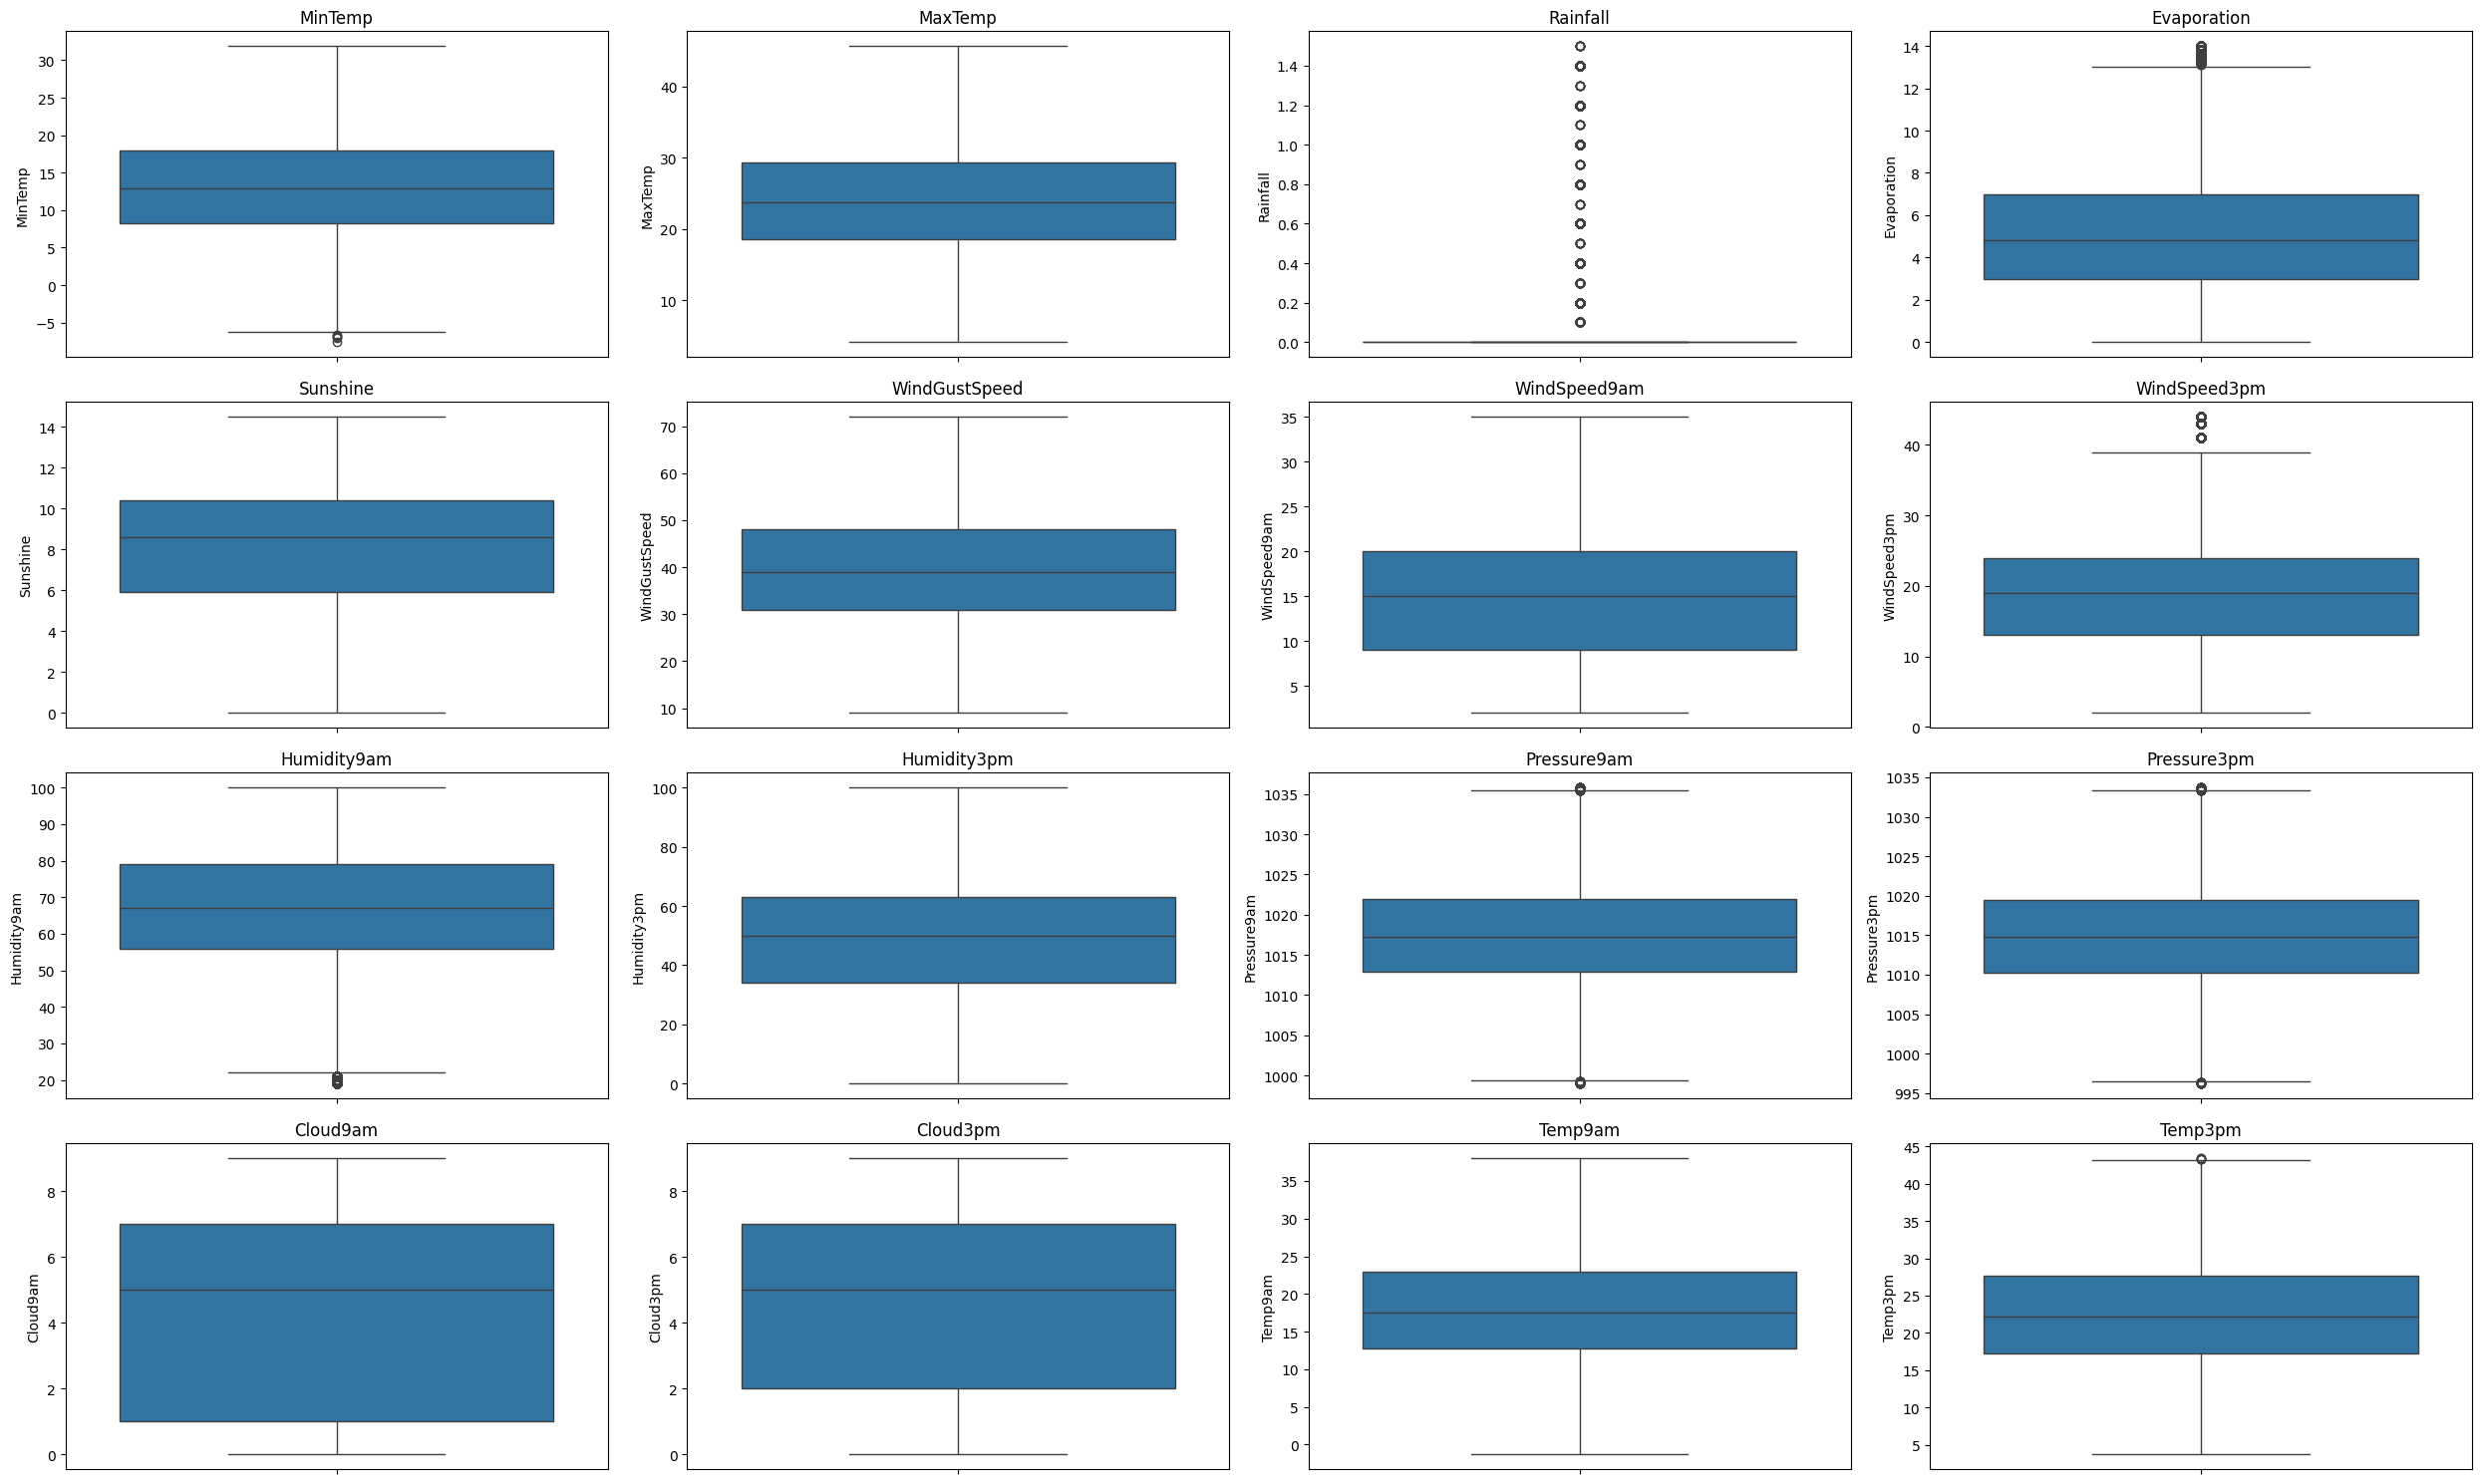

In [59]:
# Select numeric columns excluding 'object' and 'int32'
numeric_cols = df.select_dtypes(exclude=['object', 'int32']).columns

# defining the figure size
plt.figure(figsize=(25, 15))

# making for loop for subplots
for col in range(len(numeric_cols)):
    # defining subplot
    plt.subplot(4, 4, col+1)
    # plotting boxplot
    sns.boxplot(y=df[numeric_cols[col]])
    plt.title(numeric_cols[col])

# adjusting the spacing between subplots
plt.tight_layout()
plt.show()

---

### **Observation:**
- The outliers have been replaced with median
- Some columns like `Rainfall  , Evaporation , WindSpeed3pm` have left with extreme values

---

## **Checking distribution numeric columns by using histogram**

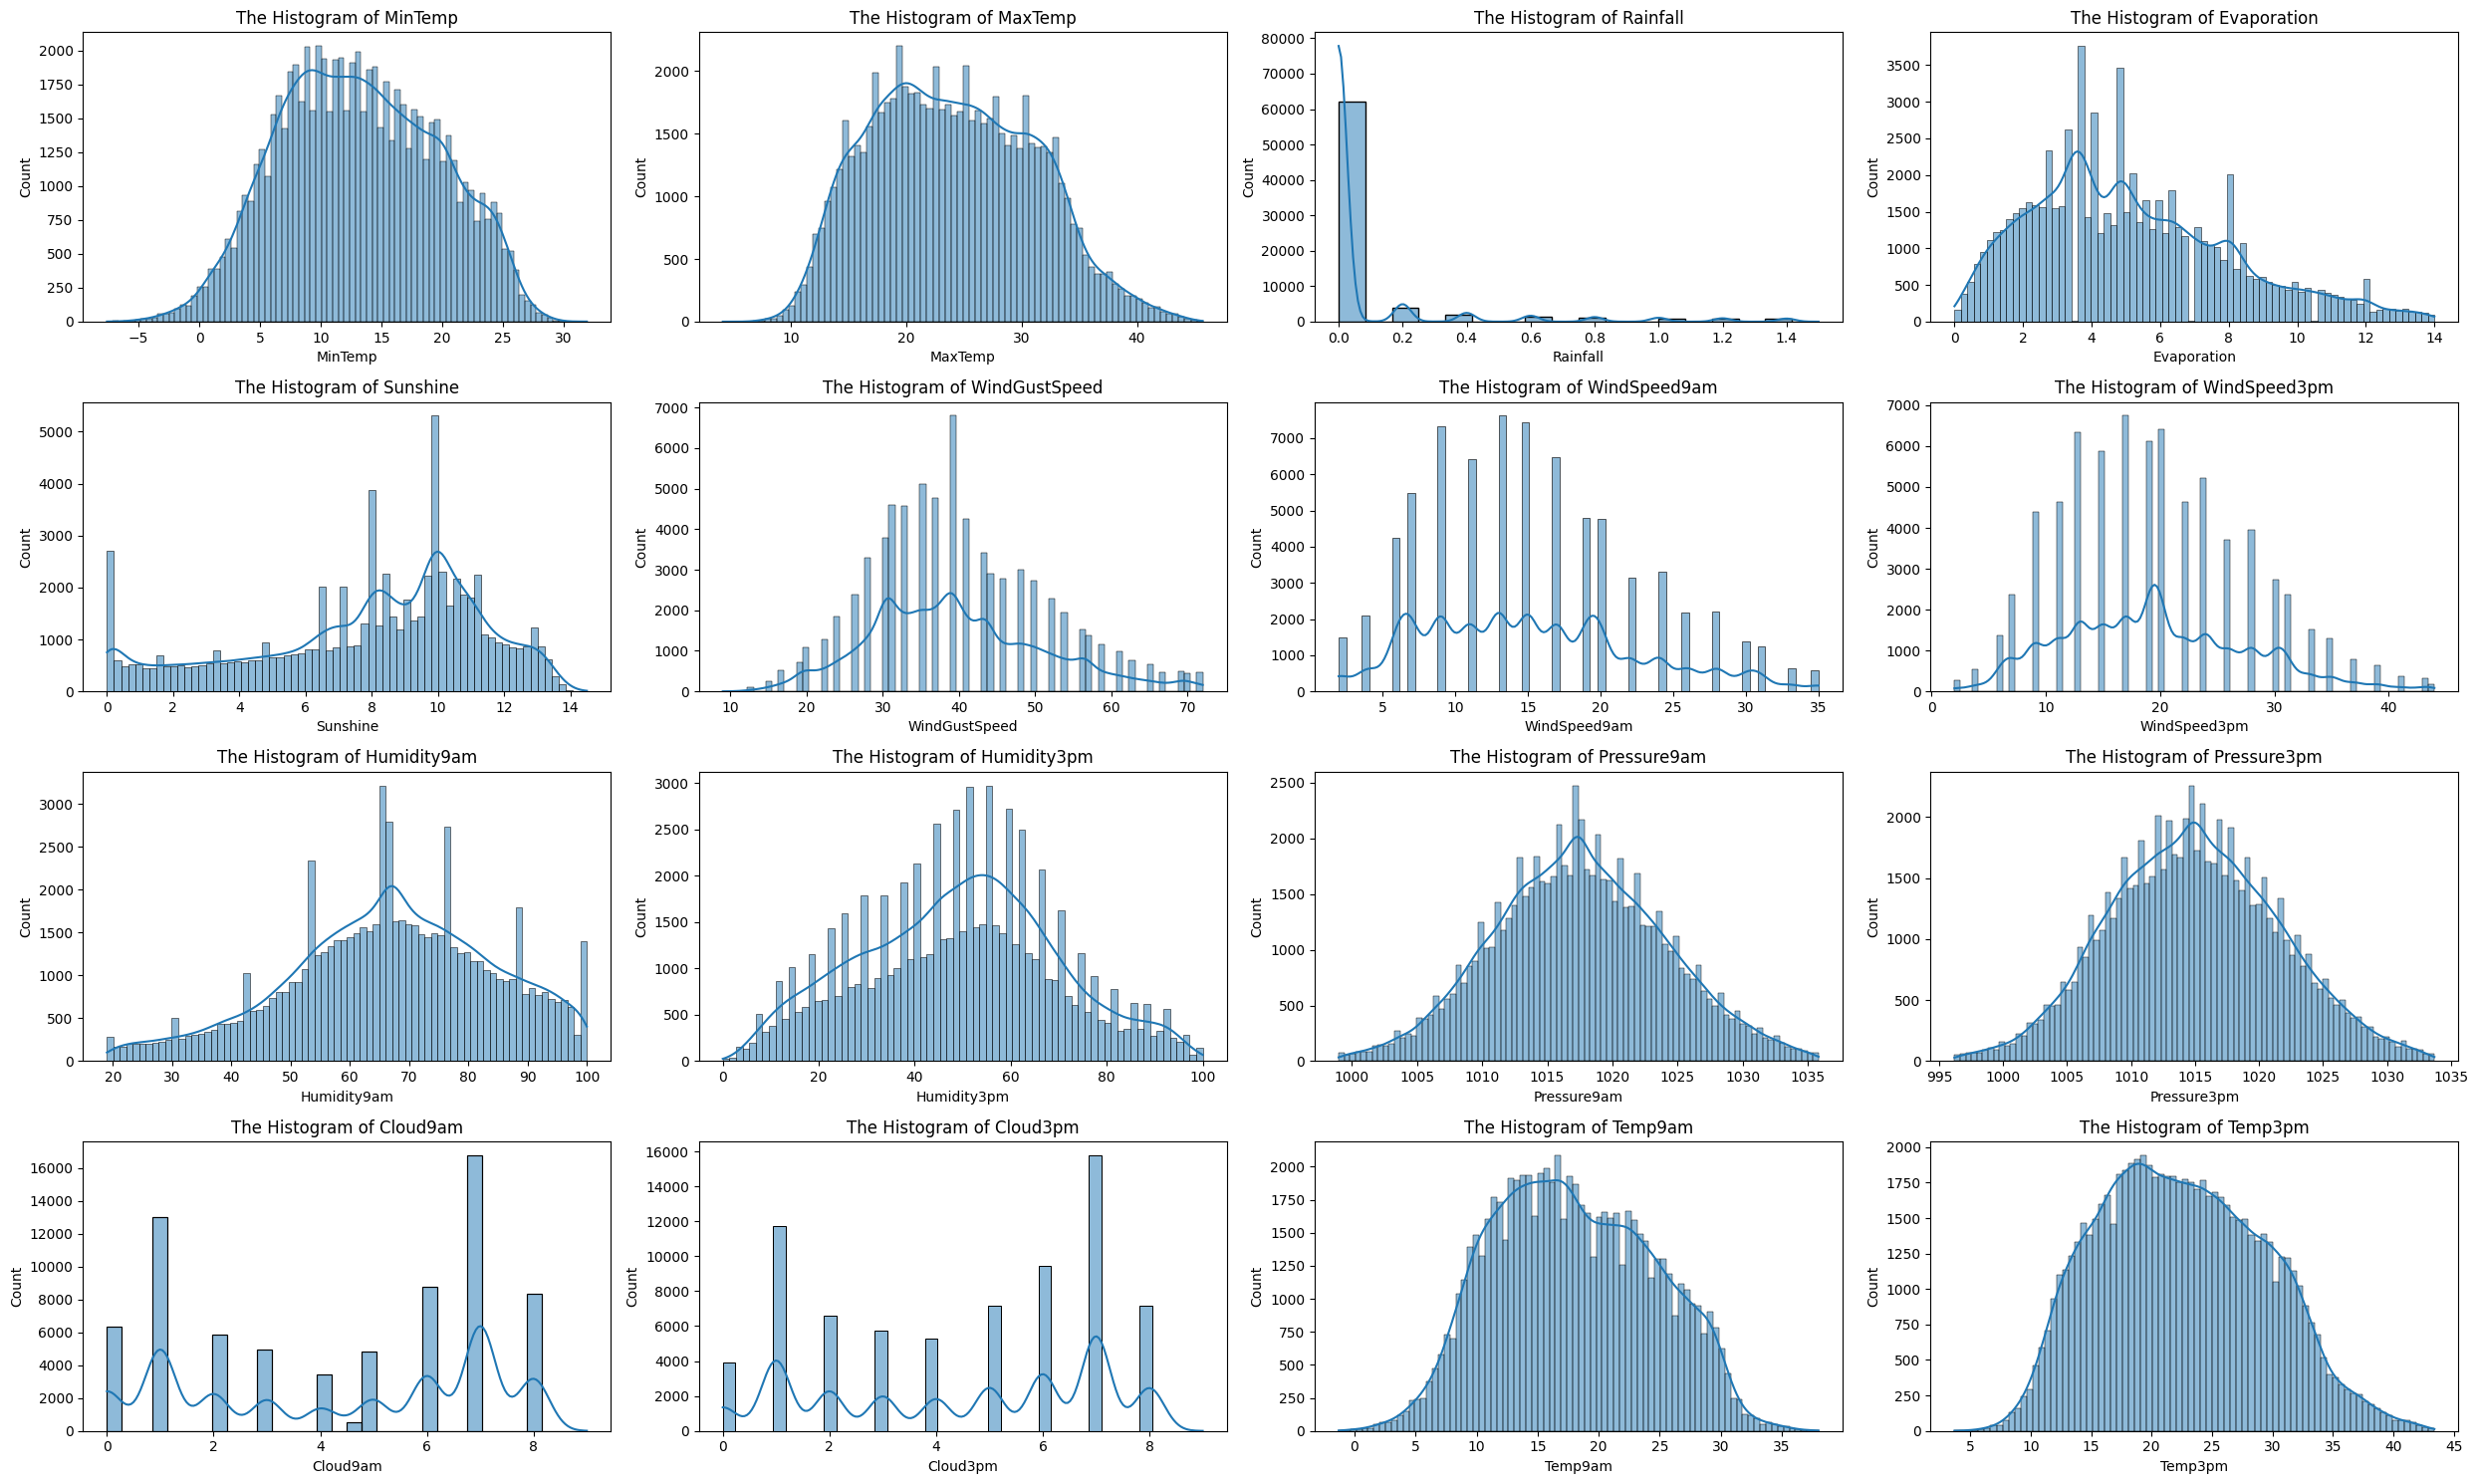

In [60]:
# Select numeric columns excluding 'object' and 'int32'
numeric_cols = df.select_dtypes(exclude=['object', 'int32']).columns

# Create subplots
plt.figure(figsize=(25, 15))  # Adjust the figure size as needed

# defining the for loop to print subplots
for column in range(len(numeric_cols)):
    plt.subplot(4, 4, column+1)
    # plotting histogram
    sns.histplot(x=df[numeric_cols[column]] , kde=True)
    # defining column name as title for each histogram
    plt.title(f'The Histogram of {numeric_cols[column]}')

# adjusting the spacing between subplots
plt.tight_layout()
plt.show()

## **Standardizing the numeric columns**

In [61]:

# selecting specific columns from the dataset
sc_col = df.select_dtypes(include='float64').columns
sc_col = sc_col.drop(['Rainfall' , 'Cloud9am' , 'Cloud3pm'])

# defining the standard scaler
sc = StandardScaler()

# defining the for loop for standard scaling
for col in sc_col:
    df[col] = sc.fit_transform(df[[col]])

### **confirming the outcome of Standard Scaling by again plotting Histogram**

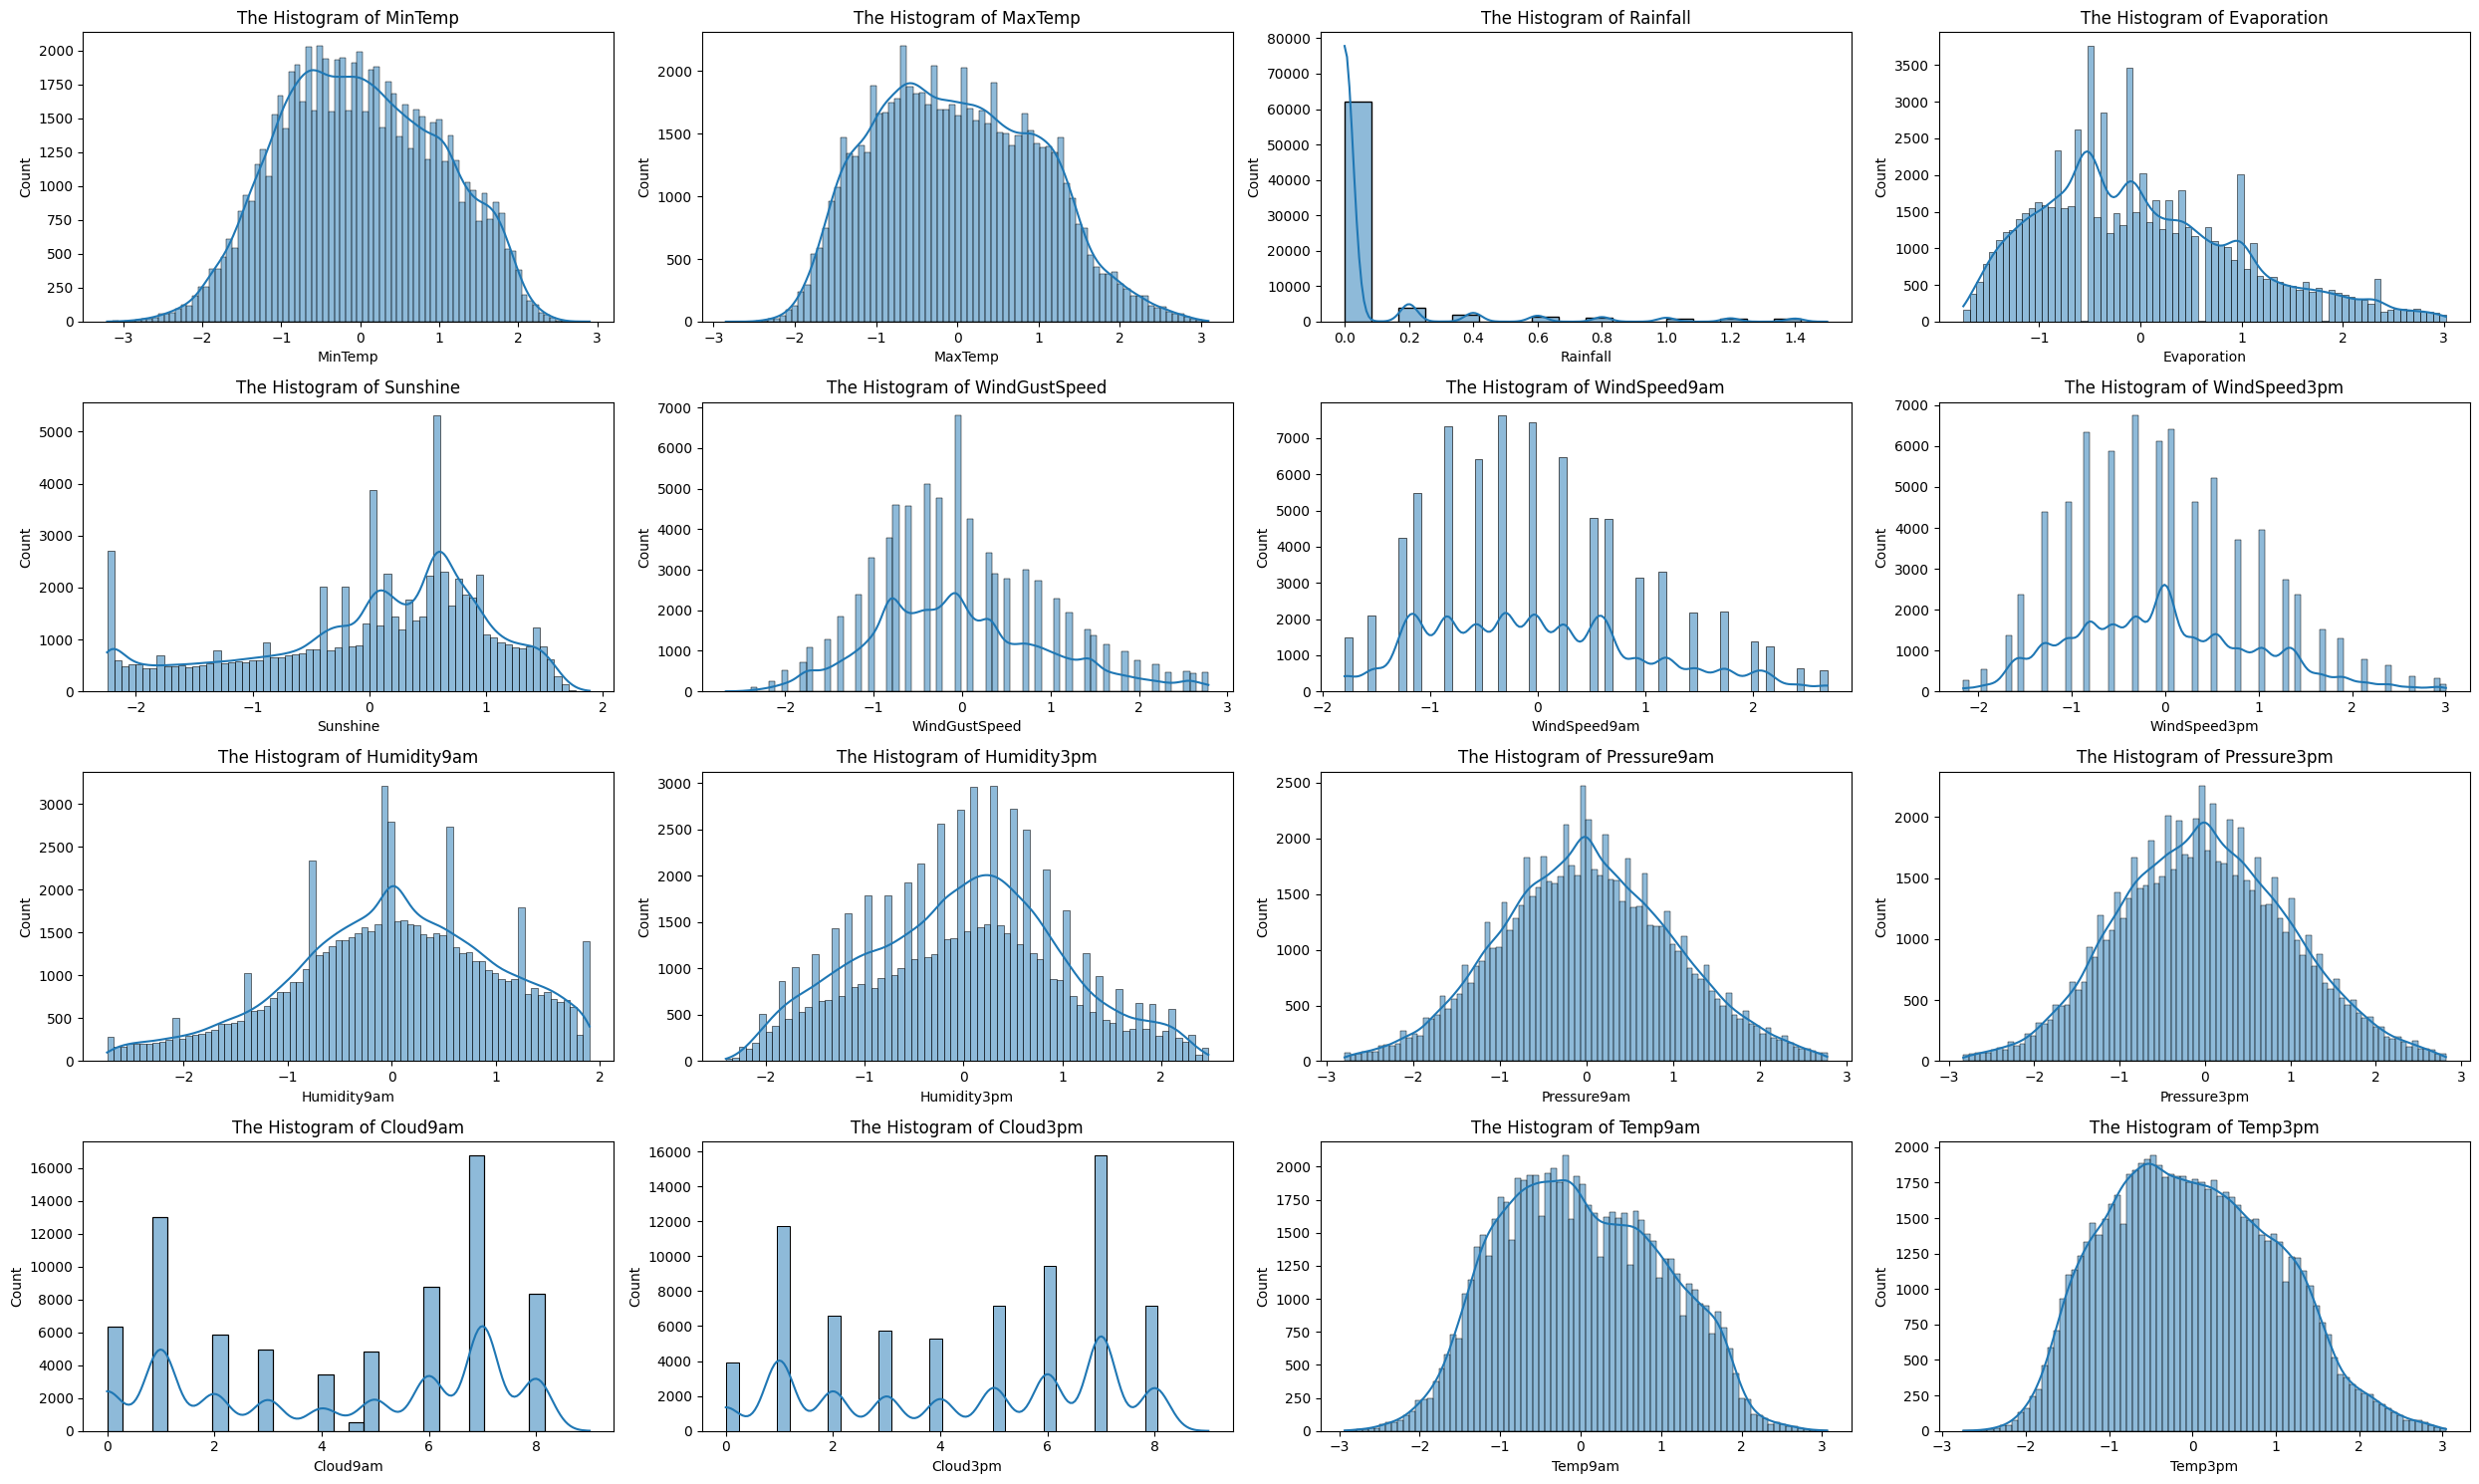

In [62]:
# selecting specific columns from the dataset
cols = df.select_dtypes(include='float64').columns

# defining the figure size
plt.figure(figsize=(25, 15))

# making for loop for subplots
for col in range(len(cols)):
    # defining subplot
    plt.subplot(4, 4, col+1)
    # plotting histogram
    sns.histplot(x=df[cols[col]] , kde=True)
    # defining column name as title for each histogram
    plt.title(f'The Histogram of {cols[col]}')

# adjusting the spacing between subplots
plt.tight_layout()
plt.show()

## **Label Encoding the categorical columns**

In [63]:
# selecting object columns from the dataset
object_col = df.select_dtypes(include='object').columns
# defining the label encoder
le = LabelEncoder()
# defining the for loop for label encoding
for col in object_col:
    df[col] = le.fit_transform(df[col])


-----

# **Logistic Regression Classifier** <a class="anchor" id="10"></a>
[Table of Contents](#10)

---


## **Theory of Logistic Regression**

When data scientists may come across a new classification problem, the first algorithm that may come across their mind is **Logistic Regression**. It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. **Logistic Regression** is also called **Logit Regression**. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.

## **Implement linear equation**


Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value.

If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equation-

    z = β0 + β1x1    

Here, the coefficients β0 and β1 are the parameters of the model.


If there are multiple explanatory variables, then the above equation can be extended to

    z = β0 + β1x1+ β2x2+……..+ βnxn
    
Here, the coefficients β0, β1, β2 and βn are the parameters of the model.

So, the predicted response value is given by the above equations and is denoted by z.


## **Sigmoid Function**

This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.

In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an S shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

Graphically, we can represent sigmoid function with the following graph.

### Sigmoid Function

![Sigmoid Function](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

## **Decision boundary**

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below-

![Decision boundary in sigmoid function](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_regression_sigmoid_w_threshold.png)

## **Assumptions of Logistic Regression**



The Logistic Regression model requires several key assumptions. These are as follows:-

1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

4. Logistic Regression model assumes linearity of independent variables and log odds.

5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

---


### **previewing the dataframe**

In [64]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,4,0.738580,1.590475,0.0,2.339189,1.262481,11,0.706283,1,12,-1.250239,0.053330,-2.677277,-1.767654,-1.686080,-1.593858,2.0,5.0,1.324370,1.581283,0,0,1,1,2009
1,4,0.815926,0.691191,0.0,-0.113685,1.462195,8,-0.245892,10,10,0.515137,-0.069639,-2.105026,-2.011625,-0.688539,-0.433169,1.0,1.0,0.363147,0.648265,0,0,2,1,2009
2,4,0.970618,1.933059,0.0,1.930376,0.777460,5,0.533160,5,6,2.008916,-0.561512,-1.418325,-1.328506,-0.779225,-0.870311,1.0,6.0,1.644778,1.799959,0,0,4,1,2009
3,4,1.357348,2.047254,0.0,2.134782,1.233950,14,-0.765260,14,15,-1.250239,-1.668227,-1.704451,-1.328506,-0.718768,-0.885385,1.0,5.0,1.705808,1.902008,0,0,5,1,2009
4,4,1.713140,2.418387,0.0,2.066647,0.149787,14,-0.419014,7,14,0.243541,-0.807449,-2.734502,-1.670065,-1.021053,-1.141641,1.0,6.0,2.392397,2.193576,0,0,6,1,2009


# **Assumptions for Machine Learning Model**  <a class="anchor" id="11"></a>

[Table of Contents](#11)

In [65]:
df.dtypes # checking the data type of each column

,0
Location,int64
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,int64
WindGustSpeed,float64
WindDir9am,int64
WindDir3pm,int64


## **correlation matrix of numeric features except `day, month & year`**

In [66]:
# correlation matrix of numeric features except `day, month & year`

df.select_dtypes(include='float64').corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.747428,-0.028466,0.502211,0.068989,0.162461,0.142306,0.142237,-0.171101,0.056903,-0.494136,-0.505096,0.077343,0.021482,0.904884,0.724463
MaxTemp,0.747428,1.000000,-0.145347,0.628416,0.432810,0.078328,0.014058,0.017592,-0.451842,-0.455919,-0.373121,-0.461986,-0.269778,-0.258888,0.890480,0.984148
Rainfall,-0.028466,-0.145347,1.000000,-0.129446,-0.128354,0.016053,0.015902,0.031847,0.146244,0.152682,0.004641,0.036427,0.123679,0.112726,-0.091295,-0.148338
Evaporation,0.502211,0.628416,-0.129446,1.000000,0.372133,0.189318,0.161161,0.120132,-0.494693,-0.386829,-0.285367,-0.316479,-0.215346,-0.222712,0.588859,0.611349
Sunshine,0.068989,0.432810,-0.128354,0.372133,1.000000,-0.030182,0.009935,0.023598,-0.463031,-0.591986,0.037649,-0.020626,-0.615989,-0.627766,0.267044,0.453494
WindGustSpeed,0.162461,0.078328,0.016053,0.189318,-0.030182,1.000000,0.523185,0.639585,-0.184740,-0.046319,-0.378371,-0.335624,0.072952,0.101891,0.130395,0.045126
WindSpeed9am,0.142306,0.014058,0.015902,0.161161,0.009935,0.523185,1.000000,0.421474,-0.215874,-0.054919,-0.169492,-0.130421,0.011775,0.035049,0.082457,0.004403
WindSpeed3pm,0.142237,0.017592,0.031847,0.120132,0.023598,0.639585,0.421474,1.000000,-0.091871,0.043984,-0.270087,-0.231557,0.071149,0.036305,0.122629,-0.003326
Humidity9am,-0.171101,-0.451842,0.146244,-0.494693,-0.463031,-0.184740,-0.215874,-0.091871,1.000000,0.646192,0.107796,0.155931,0.431514,0.341095,-0.388181,-0.443842
Humidity3pm,0.056903,-0.455919,0.152682,-0.386829,-0.591986,-0.046319,-0.054919,0.043984,0.646192,1.000000,-0.050329,0.031548,0.507036,0.499948,-0.161558,-0.503017


## **Heatmap of correlation matrix of numeric features except `day, month & year`**

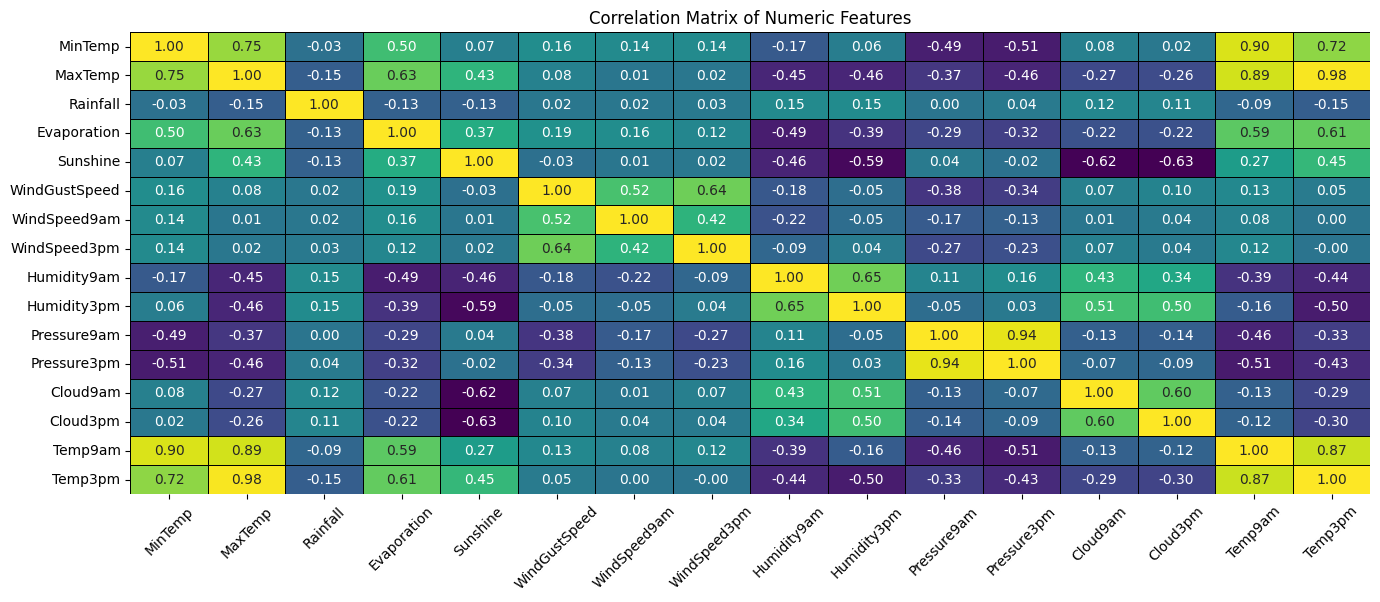

In [67]:
# Heatmap of correlation matrix of numeric features except `day, month & year`

# calculating the correlation matrix
corr_matrix = df.select_dtypes(include='float64').corr()

# defining the figure size
plt.figure(figsize=(16,6))

# plotting the heatmap
sns.heatmap(corr_matrix , cbar=False , cmap='viridis' , annot=True , fmt='.2f' , linewidths=0.5, linecolor='black')

# rotating the x axis labels
plt.xticks(rotation=45)

# setting up the title
plt.title('Correlation Matrix of Numeric Features')
plt.show()


## **Heatmap of correlation of highly correlated features**

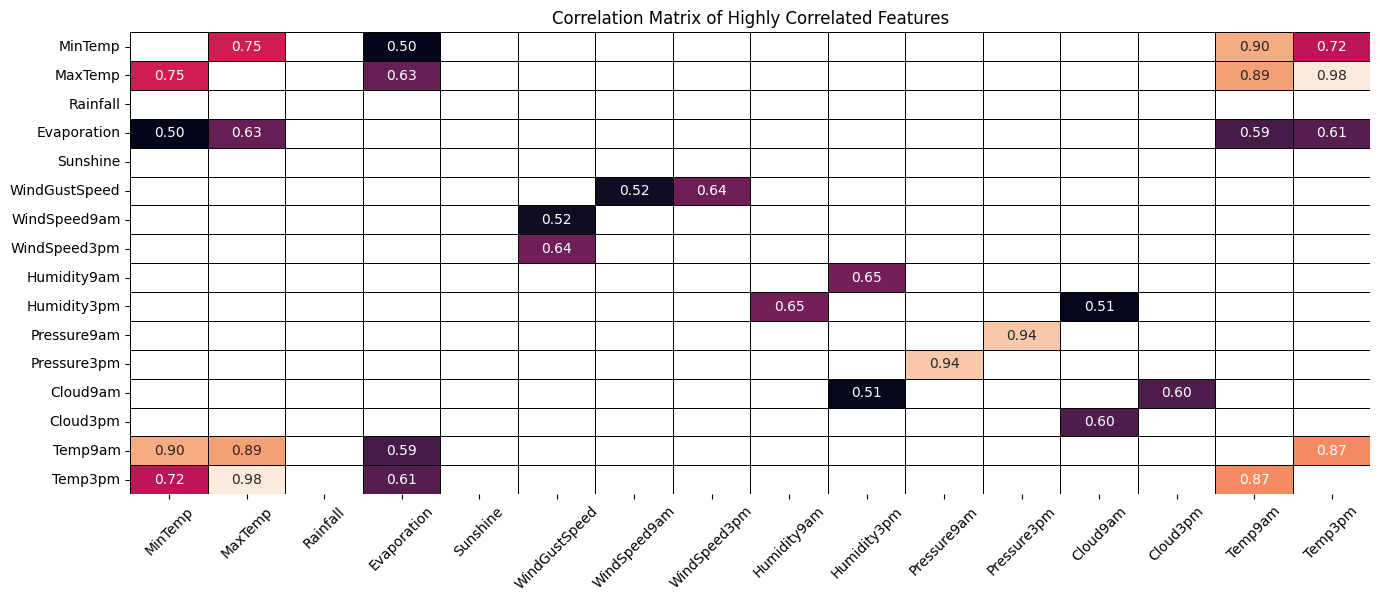

In [68]:
# correlation matrix of highly correlated features

# setting up the figure size
plt.figure(figsize=(16,6))
# calculating the correlation matrix
corr = df.select_dtypes(include='float64').corr()
# plotting the heatmap of correlation matrix which have a correlation greater than 0.5 and less than 0.99
sns.heatmap(corr[(corr>0.5) & (corr<0.99)] , cbar=False ,
             annot=True , fmt='.2f' , linewidths=0.5, linecolor='black')
# rotating the x axis labels
plt.xticks(rotation=45)
# setting up the title
plt.title('Correlation Matrix of Highly Correlated Features')
plt.show()

---
### **Observation:**
- Some of the columns like `MinTemp & MaxTemp` shows a higly positive correlation with `Temp9am & Temp3pm`.
- As during the day time `MinTemp` is almost equal to `Temp9am` and temperature is high during afternoon which means `Temp3pm` is equal to `MaxTemp` That's why they shows higly positive correlation.
- Similarly, `Pressure9am` and `Pressure3pm` shows a higly positive correlation. The reason is that atmospheric pressure is remianed almost similar of a placce.
---

In [69]:
df.columns # checking the column names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

## **Multicollinearity using -VIF (Variance Inflation Factor)**

In [70]:

# selecting the specific columns
col = df.select_dtypes(include='float64').columns

# calculating the variance inflation factor
vif = [variance_inflation_factor(df[col].values, i) for i in range(len(col))]

# creating a dataframe of vif to properly display the results
col = col
vif = pd.DataFrame({'column':col , 'vif':vif})
# rounding off the values
vif.round(2)


,column,vif
0,MinTemp,9.32
1,MaxTemp,42.30
2,Rainfall,1.15
3,Evaporation,1.96
4,Sunshine,1.87
5,WindGustSpeed,2.24
6,WindSpeed9am,1.55
7,WindSpeed3pm,1.85
8,Humidity9am,2.93
9,Humidity3pm,5.27


---
### **Observation:**

- Multicollinearity occurs when two or more predictor variables in the model are highly correlated.
- Columns like `MaxTemp , Temp3pm` are higly correlated with each other and have high values of variance inflation factor.
- Similarly, `Pressure9am` and `Pressure3pm` are higly correlated with each other and have high values of variance inflation factor.

- Hence, we can able to drop one of the column among them to avoid multicollinearity.
---

# **Dealing Class Imbalance in our Target Variable (Oversampling)** <a class="anchor" id="12"></a>

[Table of Contents](#12)

## **Checking the distribution of `RainTomorrow`**

In [71]:
# checking the value counts of `RainTomorrow`
df['RainTomorrow'].value_counts()

,count
RainTomorrow,
0,57161
1,15705


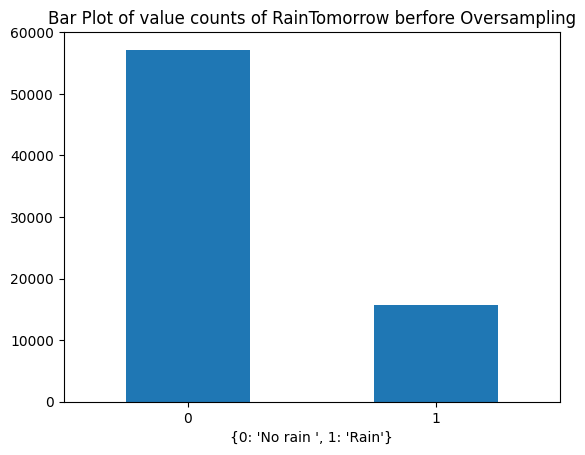

In [72]:
# checking the count plot of unique values of `RainTomorrow`
df['RainTomorrow'].value_counts().plot(kind='bar')
# setting up the title
plt.title('Bar Plot of value counts of RainTomorrow berfore Oversampling')
# rotating the x axis labels
plt.xticks(rotation=360)
plt.xlabel({0: 'No rain ', 1:'Rain'})
plt.show()

---
### **Observations:**

> Notice how imbalanced is our original dataset! Most of the enteries are with no rain. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most of time there is no rain. But we don't want our model to assume, we want our model to detect patterns that give signs of rain!

- The target variable has class imbalance
- The value count of `RainTomorrow` is 0 which means `No` is `57161`  whereas, the count of `RainTomorrow = 1` means `Yes` has only 15705 records.

- Hence, to sort this issue we can use oversampling technique SMOTE.
---

## **Oversampling using `SMOTE`**

In [73]:
# definig the X and y

X_resample = df.drop('RainTomorrow' , axis=1)

y_resample = df['RainTomorrow']

# splitting the data into train and test
X_train_resample , X_test_resample , y_train_resample , y_test_resample = train_test_split(X_resample , y_resample , test_size=0.2 , random_state=42)

# calling SMOTE
smote = SMOTE(random_state=42)

# applying SMOTE on training data
X_train_resample , y_train_resample = smote.fit_resample(X_train_resample , y_train_resample)



---
### **Observations:**

- SMOTE is a synthtetic minority oversampling technique which is used to deal with imbalanced dataset in Machine Learning.
- It works by generating synthetic samples for the minority class to balance the class distribution.

- How SMOTE Works:
    - Selection of Minority Class Samples: SMOTE first selects a random sample from the minority class.
  
    - Finding Nearest Neighbors: It then finds the k-nearest neighbors (usually k=5) of the selected sample in the feature space.
  
    - Generating Synthetic Samples: For each selected sample, SMOTE randomly selects one of its k-nearest neighbors and generates a synthetic sample along the line segment joining the two samples. This is done by interpolating between the two samples.
---

### **Plotting Count Plot of `RainTomorrow` after Oversampling**

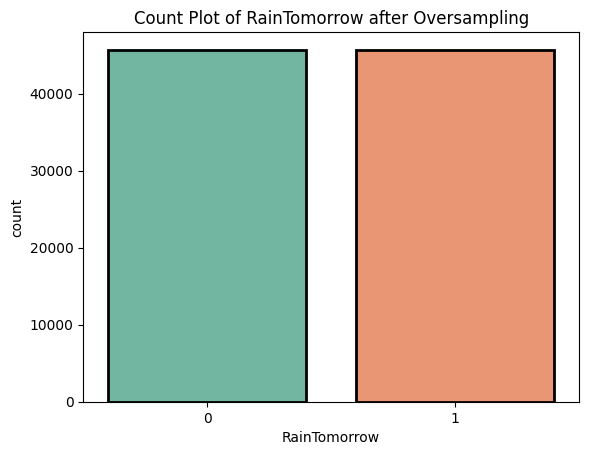

In [74]:
# plotting the count plot
sns.countplot(x=y_train_resample , palette='Set2' , edgecolor='black' , linewidth=2 )
plt.title('Count Plot of RainTomorrow after Oversampling')
plt.show()

### **Insights after Oversampling**

In [75]:
before_sampling = X_resample.shape[0]
print (f"Number of rows before SMOTE: {before_sampling} \n")

after_sampling = X_train_resample.shape[0] + X_test_resample.shape[0]

print (f"Number of rows after SMOTE: {after_sampling} \n")

increase_in_rows =  after_sampling - before_sampling
print(f"Increase in number of rows after SMOTE: {increase_in_rows}")


Number of rows before SMOTE: 72866 

Number of rows after SMOTE: 106004 

Increase in number of rows after SMOTE: 33138


----
### **Observations:**

- Before that we have 72866 instances in our dataset
- However, after applying SMOTE we have 106004 instances in our dataset which means that 33138 rows are synthetically added in our dataset

----


# **Definig Features & Target for Machine Learning** <a class="anchor" id="13"></a>

[Table of Contents](#13)

In [76]:
# defining the X and y for logistic regression

# dropping highly correlated features from the independent resampled training & testing data
X1 = X_train_resample.drop(['Temp9am', 'Temp3pm', 'Pressure3pm'] , axis=1)
X2 = X_test_resample.drop(['Temp9am', 'Temp3pm', 'Pressure3pm'] , axis=1)

# concatenating the independent testing and training data
X = pd.concat([X1 , X2] , axis=0)

# concatenating the dependent testing and training data
y1 = y_train_resample
y2 = y_test_resample

y = pd.concat([y1 , y2] , axis=0)

In [77]:
# column names of our independent features
X.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'day', 'month',
       'year'],
      dtype='object')

In [78]:
# column name of our dependent feature
y.name

'RainTomorrow'

---

### **Observations**
- Here X is the independent variable and y is the dependent variable which we take both from the resampled data
- from our indepedent variable for X we drop some higly correlated features like Temp9am, Temp3pm, Pressure3pm

> Hence, we have to drop one of them to avoid multicollinearity.
>
> **Redundant Information:** Highly correlated features can provide redundant or similar information to the model, which might not improve predictive performance but could increase computational complexity.
>
>**Overfitting:** In some cases, highly correlated features can lead to overfitting, where the model learns noise or irrelevant patterns from the data.


---

# **Model Building (Logistic Regression)** <a class="anchor" id="14"></a>

[Table of Contents](#14)

## **Train Test Split**

In [79]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Fitting the Logistic Regressor**

In [80]:
# calling the logistic regression
model = LogisticRegression()

# applying logistic regression
model.fit(X_train, y_train)

# predicting values
y_pred = model.predict(X_test)

##  **Model Evaluation**

In [81]:

# checking accuracy score
print('Accuracy Score :', accuracy_score(y_test, y_pred) , '\n')

# checking recall score
print('Recall Score :',recall_score(y_test, y_pred) , '\n')

# checking precision score
print('Precision Score :',precision_score(y_test, y_pred) , '\n')

# checking f1 score
print('F1 Score :',f1_score(y_test, y_pred) , '\n')

# checking classification report
print('Classification Report :', '\n',classification_report(y_test, y_pred))



Accuracy Score : 0.7921324465827083 

Recall Score : 0.7783547139075545 

Precision Score : 0.7741772151898734 

F1 Score : 0.776260344214855 

Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.80      0.81     11379
           1       0.77      0.78      0.78      9822

    accuracy                           0.79     21201
   macro avg       0.79      0.79      0.79     21201
weighted avg       0.79      0.79      0.79     21201



---
## **Interpretation of the Evaluation (Logistic Regression)**

#### **Accuracy Score:**
- The accuracy score is 0.79 which is a good score.

#### **Recall Score:**
- The recall score is the measure of how many of the positive samples our model predicted correctly. It is calculated as the ratio of true positives to the sum of true positives and false negatives.
- The recall score is 0.77 which indicates that our model is able to correctly identify 77% of the positive samples in the test set and we have very low count of false negatives.

#### **Precision Score:**
- The precision score is the measure of how well our model is able to identify positive samples. It is calculated as the ratio of true positives to the sum of true positives and false positives.
- The precision score is 0.77 which indicates that our model is able to correctly identify 77% of the positive samples in the test set and we have very low count of false positives.

#### **F1 Score:**
- The F1 score is the harmonic mean of precision and recall. It is calculated as 2 * (precision * recall) / (precision + recall).
- The F1 score is 0.77

---


## **Heat Map of Confusion Matrix Logistic Regressor**

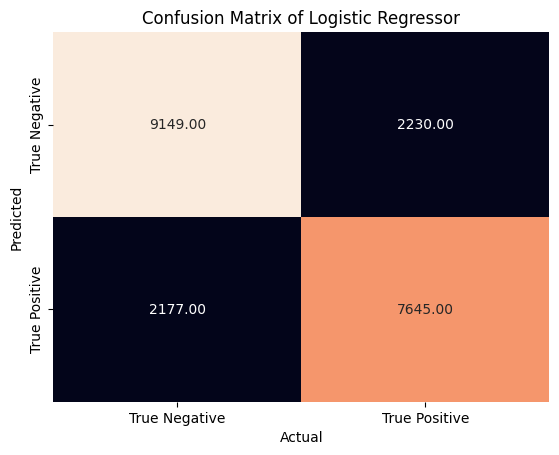

In [82]:
# confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred) , annot=True , fmt='.2f' , xticklabels=['True Negative' , 'True Positive'] ,
            yticklabels=['True Negative' , 'True Positive'] , cbar=False)

# setting up the x and y label
plt.xlabel('Actual')
plt.ylabel('Predicted')

# setting up the title
plt.title('Confusion Matrix of Logistic Regressor')

plt.show()

## **Insights from the Confusion Matrix**

In [83]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# values of true negative , true positive , false negative , false positive
print(f'True Negative: {cm[0,0]} \n')

print(f'True Positive: {cm[1,1]} \n')

print(f'False Positive: {cm[1,0]} \n')

print(f'False Negative: {cm[0,1]} \n')

True Negative: 9149 

True Positive: 7645 

False Positive: 2177 

False Negative: 2230 



## **Training and Testing Accuracy**

In [84]:
# train accuracy

y_pred_train = model.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

0.7855854156102968


In [85]:
# test accuracy

y_pred_test = model.predict(X_test)

print(accuracy_score(y_test, y_pred_test))

0.7921324465827083


---
### **Observations:**

- The training accuracy is 0.78
- The testing accuracy is 0.79

> Hence, we can say that the accuracy of the model is 79% which is quite good and there is no evidance of overfitting. As testing accuracy is more than training accuracy.

---

----

# **Random Forest Classifier** <a class="anchor" id="15"></a>
[Table of Contents](#15)

---

## **Theory**

Random Forest is a powerful ensemble learning method used for both classification and regression tasks. It operates by constructing a multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

## **Working of Random Forest:**

**Decision Trees:**

At the core of Random Forests are decision trees, which recursively split the data based on features to create segments that are as homogenous as possible with respect to the target variable.

**Ensemble Learning:**

Random Forest belongs to the ensemble learning methods where multiple decision trees are combined to improve performance. Each decision tree in the forest is trained independently on a random subset of the data and features.

**Bootstrap Aggregating (Bagging):**

Random Forest employs a technique called bootstrap aggregating, or bagging, where each tree in the forest is trained on a random sample of the data points (with replacement). This sampling process ensures diversity among the trees, reducing overfitting and improving generalization.

**Feature Randomness:**

In addition to sampling data points, Random Forest also introduces randomness in feature selection. Instead of considering all features at each split, it randomly selects a subset of features, making the algorithm less sensitive to specific features that may dominate the split decisions.

**Voting Mechanism:**

 For classification tasks, each tree in the forest predicts the class of a new data point, and the class that receives the most votes across all trees is taken as the final prediction. For regression tasks, the predictions of all trees are averaged to obtain the final prediction.

## **Assumptions & Properties**

**Non-Parametric:**

Random Forests are considered non-parametric because they do not assume a specific functional form of the relationship between features and the target variable. Instead, they learn this relationship from the data.

**No Distribution Assumption:**

Unlike some statistical models that assume a distribution of the data (e.g., normal distribution), Random Forests make no such assumptions about the underlying data distribution.

**Feature Importance:**

Random Forests provide a measure of feature importance, indicating which features contribute most to the model's predictive performance. This is derived from how much each feature improves the purity of the nodes across all trees.

**Scalability:**

Random Forests can handle large datasets with high-dimensional features. They are generally robust and less prone to overfitting compared to individual decision trees.

**Robust to Outliers:**

Due to the ensemble nature and averaging of predictions, Random Forests are robust to outliers in the data.

----



# **Model Building (Random Forest Classifier)** <a class="anchor" id="16"></a>

[Table of Contents](#16)

## **Definig Features & Target for Random Forest Classifier**


In [86]:

X.head() # checking the head of independent features

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,day,month,year
0,20,-0.375202,0.177314,0.0,-0.249956,0.920113,5,0.706283,3,4,0.515137,1.037077,-0.617175,-0.450210,-0.915253,0.0,1.0,0,23,9,2012
1,24,-0.777402,0.734014,0.0,0.363263,1.205419,0,-0.419014,7,6,-0.299652,-1.053385,0.584551,-1.035740,0.928687,0.0,1.0,0,20,10,2009
2,1,-0.266918,0.006022,0.0,-0.795039,0.064195,1,-1.977118,15,1,-1.250239,-1.668227,0.699002,0.379292,0.611287,6.0,2.0,0,22,8,2012
3,0,1.156249,2.532582,0.0,-0.113685,1.462195,0,-0.245892,0,1,1.194127,-1.545259,0.012301,-1.865242,-1.595395,0.0,0.0,0,24,1,2013
4,10,-1.380701,-0.750519,0.0,-0.113685,0.577746,13,-0.851821,12,15,-0.571248,-0.315575,0.870677,-0.840564,1.956457,0.0,0.0,0,24,8,2014


In [87]:
X.columns # checking the name of independent features

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'day', 'month',
       'year'],
      dtype='object')

In [88]:
print(f'Our dependent feature is "{y.name}"') # checking the name of dependent feature

Our dependent feature is "RainTomorrow"


## **Fitting the Random Forest Classifier**

In [89]:
# calling the random forest
rf = RandomForestClassifier( random_state=42)
# applying random forest
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## **Predicting the values**

In [90]:
# predicting values
y_pred = rf.predict(X_test)

## **Evaluating the Random Forest Classifier**

In [91]:
# checking accuracy score
print('Accuracy Score :', accuracy_score(y_test, y_pred) , '\n')

# checking recall score
print('Recall Score :',recall_score(y_test, y_pred) , '\n')

# checking precision score
print('Precision Score :',precision_score(y_test, y_pred) , '\n')

# checking f1 score
print('F1 Score :',f1_score(y_test, y_pred) , '\n')

# checking classification report
print('Classification Report :', '\n',classification_report(y_test, y_pred))



Accuracy Score : 0.9033064478090657 

Recall Score : 0.8898391366320505 

Precision Score : 0.900288421920066 

F1 Score : 0.8950332821300563 

Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     11379
           1       0.90      0.89      0.90      9822

    accuracy                           0.90     21201
   macro avg       0.90      0.90      0.90     21201
weighted avg       0.90      0.90      0.90     21201



## **Heat Map of Confusion Matrix Random Forest Classifier**

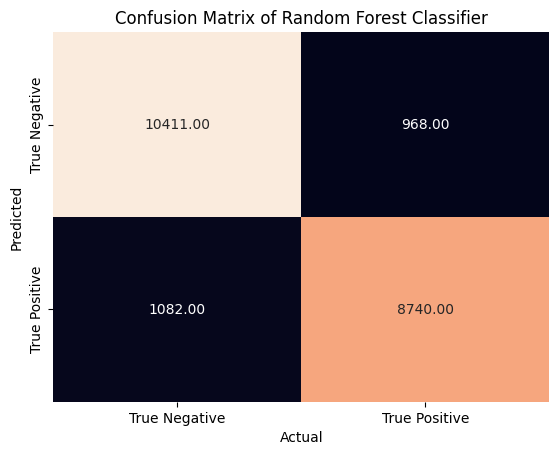

In [92]:
# confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred) , annot=True , fmt='.2f' , xticklabels=['True Negative' , 'True Positive'] ,
            yticklabels=['True Negative' , 'True Positive'] , cbar=False)

# setting up the x and y label
plt.xlabel('Actual')
plt.ylabel('Predicted')

# setting up the title
plt.title('Confusion Matrix of Random Forest Classifier')

plt.show()

## **Training & Testing Accuracy**

In [93]:
# calculating the train accuracy

y_pred_train = rf.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

0.9999882079643408


In [94]:
# calculating the test accuracy

y_pred_test = rf.predict(X_test)

print(accuracy_score(y_test, y_pred_test))

0.9033064478090657


---

### **Interpretation of the Evaluation**

- The Accuracy score of Random Forest Classifier 0.90 which is relatively much higher than the Logistocs Regression model.
- But after carefully analysing separtely the accuracy scores of training and testing, we can say that Random Forest Classifier is overfitting on the training set. And, it has learned all the noise in the training data.
---

# **Hyperparameter Tuning of Random Forest Classifier** <a class="anchor" id="17"></a>

[Table of Contents](#17)

In [95]:
# calling the random forest and adjusting the parameters
model = RandomForestClassifier(
    n_estimators=150,      # Number of trees
    max_depth=10,          # Maximum depth of each tree
    min_samples_split=10,  # Minimum samples required to split an internal node
    min_samples_leaf=5,    # Minimum samples required to be at a leaf node
    max_features=5,        # Number of features to consider when looking for the best split
    criterion='entropy',   # Splitting criterion
    random_state=42
)

# fitting the model
model.fit(X_train, y_train)

# calculating the train and test accuracy
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# printing the train and test accuracy
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)}")

Train accuracy: 0.8666674528023772
Test accuracy: 0.8565633696523749


----
### **Interpretation of Hyperparameter tuning of Random Forest Classifier**
- In order to bring complexity in the Random Forest Classifier, we can tune some parameters of the model which eventually brings complexity in model and avoid overfitting during training phase. So by doing hyperperamter tunning we achieve the harmony in training and testing accuracy. Although, minor overfitting is still present and  overall, accuracy of our Random Forest Classifier also decreased.

- Here are the detials of tunning:
  - **n_estimators:**
     limit the number of trees to `150`.
  
  - **max_depth:** limit the depth of each tree to `10`. It means each decision tree in the roandom have maximum subset of 10 level. This means the longest path from the root to any leaf node in the tree will consist of 10 decision points.
  
  - **min_samples_split:** `10`. It means that at least 10 instances should be in a node in order to split it. In the Random Forest algorithm it specifies the minimum number of samples required to split an internal node during the construction of each decision tree in the forest.
  
  - **min_samples_leaf:** `5`. It means that at least 5 instances should be in a node in order to be considered a leaf node. It means that in the Random Forest algorithm each decision tree at the end of each branch, there are leaf nodes that represent the final predictions (classes or values). min_samples_leaf controls how many samples must be in a leaf node.

  - **max_features:** `5`. It means that at most 5 features should be considered at each split. In the Random Forest algorithm it specifies the number of features to consider when looking for the best split. It is a parameter that determines the maximum number of features to consider when looking for the best split at each node of a decision tree in the Random Forest ensemble.

  - **criterion:**  `entropy`. It means that the criterion used to evaluate the quality of a split is the logarithmic loss. Entropy is calculated for each possible split of a node. It measures the impurity of the node. A node with low entropy means it is more pure (contains mostly samples from one class), while high entropy indicates more mixed classes.

---

---
# **Extreme Gradient Boosting (XGBoost) Classifier** <a class="anchor" id="18"></a>

[Table of Contents](#18)


---

## **Theory:**

XGBoost, which stands for eXtreme Gradient Boosting, is a powerful and popular machine learning algorithm known for its efficiency and effectiveness in dealing with structured data for regression, classification, and ranking tasks. It is an ensemble learning algorithm that combines multiple decision trees to improve the performance of the model.
It sequentially builds an ensemble of weak learners (typically decision trees) and combines them to improve predictive performance.

## **Working of XGBoost**

**Base Learner:**
XGBoost starts with an initial base learner (often a decision tree) and iteratively improves it by adding new trees that correct the errors made by existing models.

**Gradient Descent Optimization:**
- It minimizes a specified loss function by using gradient descent optimization techniques.
- Each new tree is trained to predict the residuals (difference between actual and predicted values) of the previous ensemble, thereby reducing the overall error.

**Boosting Rounds:**
- The training process continues for a specified number of boosting rounds (iterations) or until a stopping criterion is met (e.g., no further improvement in validation error).

**Objective Function:**
- XGBoost allows customization of the objective function based on the specific task (e.g., regression, binary classification, multi-class classification).

## **Properties:**
- **Accuracy:** XGBoost often achieves state-of-the-art performance on a wide range of machine learning tasks.
- **Speed:** It is optimized for speed and efficiency, making it suitable for large datasets and complex models.
- **Flexibility:** Supports various regularization techniques, custom loss functions, and hyperparameter tuning options.
- **Interpretability:** Provides insights into feature importance and model behavior, aiding in model interpretation.
----

# **Model Building(XGBoost Classifier)** <a class="anchor" id="19"></a>

[Table of Contents](#19)

## **Defining Features & Target for XGBoost Classifier**

In [96]:
# previewing the independent features

X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,day,month,year
0,20,-0.375202,0.177314,0.0,-0.249956,0.920113,5,0.706283,3,4,0.515137,1.037077,-0.617175,-0.450210,-0.915253,0.0,1.0,0,23,9,2012
1,24,-0.777402,0.734014,0.0,0.363263,1.205419,0,-0.419014,7,6,-0.299652,-1.053385,0.584551,-1.035740,0.928687,0.0,1.0,0,20,10,2009
2,1,-0.266918,0.006022,0.0,-0.795039,0.064195,1,-1.977118,15,1,-1.250239,-1.668227,0.699002,0.379292,0.611287,6.0,2.0,0,22,8,2012
3,0,1.156249,2.532582,0.0,-0.113685,1.462195,0,-0.245892,0,1,1.194127,-1.545259,0.012301,-1.865242,-1.595395,0.0,0.0,0,24,1,2013
4,10,-1.380701,-0.750519,0.0,-0.113685,0.577746,13,-0.851821,12,15,-0.571248,-0.315575,0.870677,-0.840564,1.956457,0.0,0.0,0,24,8,2014


In [97]:
# previewing the dependent feature

print(f'Our dependent feature is "{y.name}"')

Our dependent feature is "RainTomorrow"


#

## **Fitting the Model**

In [98]:
# calling the xgboost classifier
xgb = XGBClassifier(random_state=42)

# fitting the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

## **Preicting values using XGBoost Classifier**

In [99]:
# predicting values
y_pred = xgb.predict(X_test)


## **Evaluating the Model**

In [100]:
# checking accuracy score
print('Accuracy Score :', accuracy_score(y_test, y_pred) , '\n')

# checking recall score
print('Recall Score :',recall_score(y_test, y_pred) , '\n')

# checking precision score
print('Precision Score :',precision_score(y_test, y_pred) , '\n')

# checking f1 score
print('F1 Score :',f1_score(y_test, y_pred) , '\n')

# checking classification report
print('Classification Report :', '\n',classification_report(y_test, y_pred))



Accuracy Score : 0.9049101457478421 

Recall Score : 0.8624516391773569 

Precision Score : 0.9272110332749562 

F1 Score : 0.8936596687414283 

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     11379
           1       0.93      0.86      0.89      9822

    accuracy                           0.90     21201
   macro avg       0.91      0.90      0.90     21201
weighted avg       0.91      0.90      0.90     21201



## **Heat Map of Confusion Matrix XGBoost Classifier**

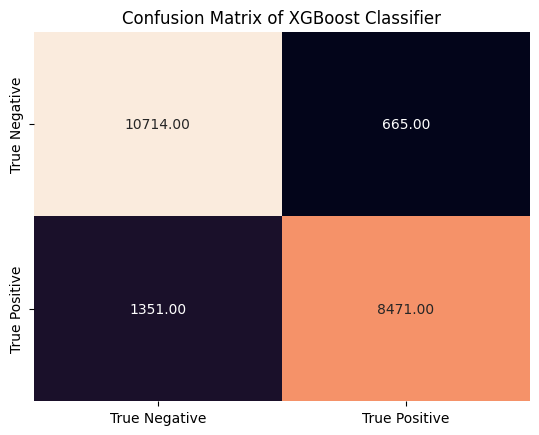

In [101]:
# confusion matrix heatmap

# confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred) , annot=True , fmt='.2f' , xticklabels=['True Negative' , 'True Positive'] ,
            yticklabels=['True Negative' , 'True Positive'] , cbar=False)

plt.title('Confusion Matrix of XGBoost Classifier')
plt.show()

## **calculating the train and test accuracy**

In [102]:
# train and test accuracy

y_pred_train = xgb.predict(X_train)

y_pred_test = xgb.predict(X_test)


print(f'Train Accuracy Score : {accuracy_score(y_train, y_pred_train):.2f}')

print(f'Test Accuracy Score :{ accuracy_score(y_test, y_pred_test):.2f}')

Train Accuracy Score : 0.93
Test Accuracy Score :0.90


----
### **Interpretation of XGBoost Classifier:**
- As we can see XGB Classifier is performing well and have overall accuracy of 0.93
- the slight difference between training and test accuracy (0.93 vs. 0.90) suggests a good balance, where the model generalizes well to unseen data.
---

# **Best Model Selection** <a class="anchor" id="20"></a>

[Table of Contents](#20)

In [103]:
# choosing the best model

# creating an empty list
result = []

# creating a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
    }

# fitting the model
for name , model in models.items():

    # Time for the fit process
    start_fit = time.time()

    # fitting the model
    model.fit(X_train, y_train)

    # ending time of the fit process
    end_fit = time.time()

    # calculating the fit time for each model
    fit_time = end_fit - start_fit

    # taking predictions from model on test data
    y_pred = model.predict(X_test)

    # calculating the accuracy score
    acc = accuracy_score(y_test, y_pred)
    # calculating the precision score
    precision  = precision_score(y_test, y_pred)
    # calculating the recall score
    recall = recall_score(y_test, y_pred)
    # appending the result in the list
    result.append((name , acc , precision , recall , fit_time ))



# printing the evaluation result of every model
result = pd.DataFrame(result ,  columns=['Model', 'Accuracy Score' , 'Precision' , 'Recall' , 'Fit Time (s)'])

result

,Model,Accuracy Score,Precision,Recall,Fit Time (s)
0,Logistic Regression,0.792132,0.774177,0.778355,1.290118
1,Random Forest,0.903306,0.900288,0.889839,32.679884
2,XGBoost,0.904910,0.927211,0.862452,1.227705


# **Conclusion (Model Comparison)** <a class="anchor" id="21"></a>

[Table of Contents](#21)

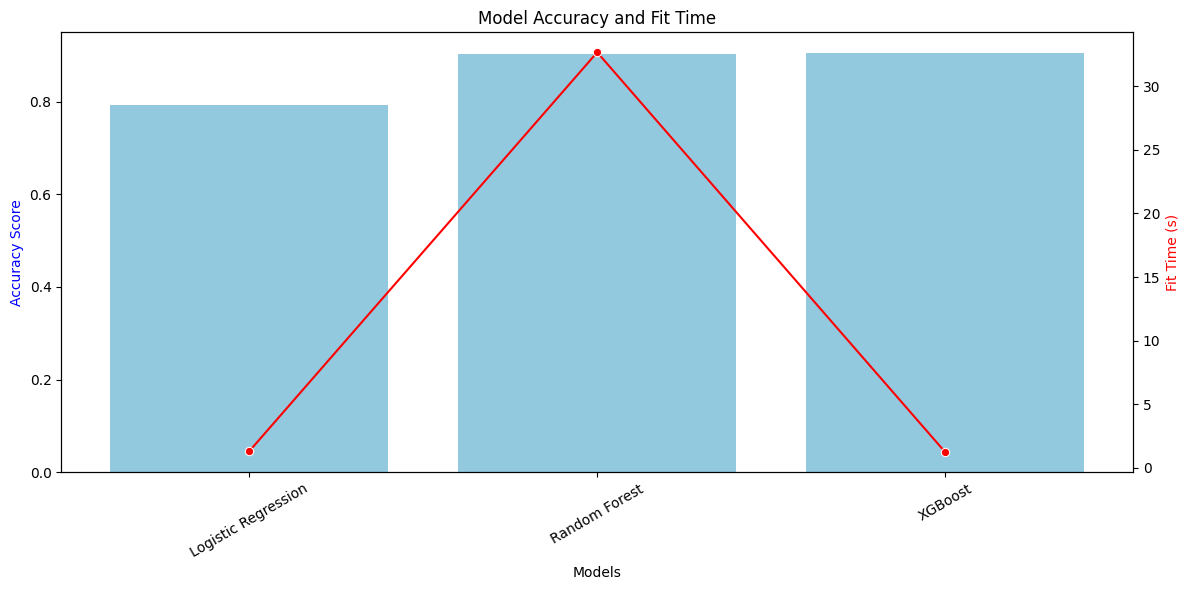

In [104]:
# Plotting the bar plot for accuracy scores
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for accuracy scores
sns.barplot(x='Model', y='Accuracy Score', data=result, ax=ax1, color='skyblue')
# setting up the x and y label for 1st plot
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy Score', color='blue')
# rotating the x labels
plt.xticks(rotation=30)

# Adding the line plot for fit time on the same axis
ax2 = ax1.twinx()
# Line plot for fit time
sns.lineplot(x='Model', y='Fit Time (s)', data=result, ax=ax2, color='red', marker='o')
# setting up the x and y label for 2nd plot
ax2.set_ylabel('Fit Time (s)', color='red')

# Adding the title and legend
plt.title('Model Accuracy and Fit Time')
fig.tight_layout()

# Show the plot
plt.show()


---

### **Best Model Selection**
- As we can see XGB Classifier is performing well and have overall accuracy of 0.93 and also has the least fit time. As compared to Random Forest and Logistic Regression.
- Random forest has also highest acccuracy but it has higher training time and also it causes fitting issues.
- Random forest require more tuning to get the best model but it is computationally expensive.

> **Conclusion**
> So, XGB Classifier is the best model for this dataset.
----